<div class="alert alert-block alert-info">
<font size="10">Univariate Time Series</font>
<br><font size="5">Autoregressive  and Linear Forecasting Models</font></br>
<p><a href="https://ph.linkedin.com/in/marwell-dalangin">by Dalangin Marwell</a></p>
Nov 2022
</div>

![Introduction](time-series-introduction.png)

# Introduction

Up until now, the abovementioned quotation from *Abraham Lincoln* is undeniably applicable. There's always a concept of the future and time. However, other instances are more straightforward to forecast than others. Whether it will rain or not tomorrow morning can be predicted. Conversely, tomorrow's lotto numbers cannot be foretold with certainty, I know what you are thinking "*433 winners of 6/55 Grand Lotto*". Like what we have seen in the stock prices, some follow a consistent trend while others do not. Most of the time, the values of past and present scenarios often resemble one another. As what I normally say, data science is an art...art of finding patterns and art of the possible.

As good decision makers, creating data-driven outcomes involves the best possible judgment about future events. This requires taking advantage of forecasting, especially in times like what we have experienced in the last two years. More crucial than ever, the world needs data scientists like us to create and navigate competently through volatility, uncertainty, complexity, and ambiguity **(VUCA)** world. 

This notebook will discuss further the univariate time series analysis and forecasting concepts using **auto-regressive** and **linear models** with the following objectives:

## Learning Objectives
1. Define autoregressive and linear models
2. Identify the baseline methods
2. Develop models and select best parameters 
3. Interpret and understand the models
4. Evaluate the models using different metrics
5. Identify the advantages and limitations
6. Realize the applications through pragmatic use cases


# Autoregressive Models


In our first lecture, we discussed the representation of a stochastic process as the output from a linear filter, whose input is white noise $a_{t}$ such that

\begin{equation}
\begin{aligned}
\tilde{z}_{t} &=  a_{t} + \Psi_{1}a_{t-1} + + \Psi_{2}a_{t-2} + \dots\\
&= a_{t} + \sum_{j=1}^{\infty}\Psi_{j}a_{t-j}
\end{aligned}
\end{equation}


Based on the above, the auto-regressive model includes auto-regressive terms or moving average terms with an autoregressive model. It has dynamics given by:

\begin{equation}
\tilde{z}_{t}  =  \delta + \phi_{1}\tilde{z}_{t-1} + \dots + \phi_{p}\tilde{z}_{t-p} + a_{t}
\end{equation}

the parameters $\phi_{1}, \phi_{1},\dots, \phi_{p}$ of an $AR{(p)}$ process


In this notebook, the backshift operator $\mathbf{B}$ is critical representing the mathematical representation for the various operator functions. For general backshit operator,

\begin{equation}
\mathbf{B}^k{x_t}  =  x_{t-k}
\end{equation}

Hence, for $lags 1$ and $lag 2$,
\begin{equation}
\begin{aligned}
\mathbf{B}{x_t}   &=  x_{t-1}\\
\mathbf{B}^2{x_t} &=  x_{t-2}
\end{aligned}
\end{equation}



Rewriting with the use of  $\mathbf{B}$:

\begin{equation}
(1- \phi_{1}\mathbf{B}- \dots - \phi_{p}\mathbf{B}^p)\tilde{z}_{t} = \phi(\mathbf{B})\tilde{z}_{t} =  a_{t}
\end{equation}

must satisfy certain condition for it to be stationary. For $AR(1)$,

\begin{equation}
(1- \phi_{1})\mathbf{B}\tilde{z}_{t}  =  a_{t}
\end{equation}

Rewriting it

\begin{equation}
\tilde{z}_{t}  =  (1- \phi_{1}\mathbf{B})^{-1} a_{t} = \sum_{j=0}^{\infty}{\phi_{1}^{j}a_{t-j}}
\end{equation}

provided that the infinite series on the right converges in an appropriate sense
\begin{equation}
\Psi(\mathbf{B}) = (1- \phi_{1}\mathbf{B})^{-1} =  \sum_{j=0}^{\infty}{\phi_{1}^{j}\mathbf{B}^j}
\end{equation}


## Autoregressive (AR)

Based on the above, $y_t$ is an _autoregressive_ process of order $p$ if $y_t$ follows:  

\begin{equation}
y_t = c + \phi_{1}y_{t-1} +\;\dots \;+\phi_{p}y_{t-p} + \epsilon_{t}
\end{equation}

We assume a linear relationship between the value of a variable at time $t-1,t-2,\dots t-p\dots,2,1,0$.

Rewriting again with the use of  $\mathbf{B}$:

\begin{equation}
y_t - \phi_{1}y_{t-1}-\;\dots \;-\phi_{p}y_{t-p} = \epsilon_{t}
\end{equation}

\begin{equation}
(1 -\phi_{1}\mathbf{B}-\;\dots \;-\phi_{p}\mathbf{B}^p)y_t = \epsilon_{t}
\end{equation}

from the above 
\begin{equation}
\phi(\mathbf{B})\tilde{z}_{t} =  a_{t} \quad and \quad \tilde{z}_{t} = \phi^{-1}(\mathbf{B})a_{t} 
\end{equation}

\begin{equation}
\phi(\mathbf{B})y_t = \epsilon_{t}
\end{equation}
provided that the right side is convergent where $\phi(\mathbf{B}) = 0$ and the $AR$ associated polynomial

\begin{equation}
\begin{aligned}
\phi(\mathbf{B}) &= 1 - \phi_{1}\mathbf{B}-\phi_{2}\mathbf{B}^2-\;\dots \;-\phi_{p}\mathbf{B}^p\\
\phi(z) &= 1 - \phi_{1}{z}-\;\dots \;-\phi_{p}{z}^p = \sum_{j=0}^{p}{\phi_{j}{z^j}} , \qquad \phi_{p} \neq 0
\end{aligned}
\end{equation}

Now let's implement it.

**Import libraries and packages**

Let's use all the necessary libraries. We will use the `household_power_consumption.txt` at `./data`.

In [42]:
# Load modules
import os
import warnings
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import datetime
from math import sqrt
from pandas import Series
import matplotlib.pyplot as plt
import plotly.express as px
import pylab as plot
import plotly.offline as pyoff
import plotly.tools as tools
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pmdarima as pm

pyoff.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Constant Helpers

# For Plotting
STYLE = 'ggplot'
plt.style.use(STYLE)
FIGSIZE = (14, 7)
FIGDPI = 180

# Taken from Prof. Felix's Univariate Time Series Notebook
REGRESSION = "c"
AUTOLAG = "AIC"
NLAGS = "auto"

# Differencing Names
ORIGINAL_NAME = 'Original'
FIRST_DIFF_NAME = '1st Order'
SECOND_DIFF_NAME = '2nd Order'

# “Life, the universe, and everything”!
SEED = 42

# For Modeling
SPLIT = 0.80

# Path of the dataset
CSV_PATH = r"../data/household_power_consumption.txt"

In [48]:
class UniTS_Toolbox:

    def __init__(self, data=None, lags=None):
        """Initialize the toolbox

        Parameters
        ----------
        data {Series}
            - dataset
        lags {int, array_like}, optional
            - Lag values that can be an int or array
        figsize (float, float)
            - Width, height in inches
        """
        self.data = data
        self.lags = lags

    # Function for preprocessing
    def preprocess_dataset(self, csv_path):
        """Perform preprocessing of the dataset

        Parameters
        ----------
        csv_path (string)
        - path of the dataset

        Return
        ----------
        df_power_consumption - Time series data 
        """

        df = pd.read_csv(csv_path,
                         sep=';',
                         parse_dates={'dt': ['Date', 'Time']},
                         infer_datetime_format=True,
                         low_memory=False,
                         na_values=['nan', '?'],
                         index_col='dt')
        df.columns = [x.lower() for x in df.columns]

        # features
        relevant_columns = [
            "global_active_power", "global_reactive_power", "voltage",
            "global_intensity", "sub_metering_1", "sub_metering_2",
            "sub_metering_3"
        ]

        # Handling missing values
        for every_column in relevant_columns:
            df[every_column] = df[every_column].interpolate()

        # Computation for overall power consumtion
        eq1 = (df['global_active_power'] * 1000 / 60)
        eq2 = df['sub_metering_1'] + \
            df['sub_metering_2'] + df['sub_metering_3']
        df['power_consumption'] = eq1 - eq2
        relevant_columns = df.columns

        # Aggregating level: "M" - Monthly, "W" - Weekly, "D" - Daily
        df = df[relevant_columns].resample('W').sum()
        df_power_consumption = df['power_consumption']

        return (df_power_consumption)

    # Function for plotting
    def plot_it(self,
                x1=None,
                y1=None,
                x2=None,
                y2=None,
                x3=None,
                y3=None,
                x_title=None,
                y_title=None,
                title=None,
                t1_name=None,
                t2_name=None,
                t3_name=None,
                mode=None):
        """Plot Graphs using Plotly

        Parameters
        ----------
        x1 {float}
            - trace 1 numbers to be plotted in x
        y1 {float}
            - trace 1 numbers to be plotted in y
        x2 {float}
            - trace 2 numbers to be plotted in x
        y2 {float}
            - trace 2 numbers to be plotted in y
        x3 {float}
            - trace 3 numbers to be plotted in x
        y3 {float}
            - trace 3 numbers to be plotted in y
        x_title {string}(default: None)
            - label in x-axis
        y_title {string}(default: None)
            - label in y-axis
        title (string)(default: None)
            - plot title
        t1_name (string)(default: None)
            - trace 1 title
        t2_name (string)(default: None)
            - trace 2 title
        t3_name (string)(default: None)
            - trace 3 title
        mode (string)(default: None)
            - type of the marker
        """
        trace1 = go.Scatter(x=x1,
                            y=y1,
                            mode=mode,
                            marker=dict(size=12,
                                        color='royalblue',
                                        line=dict(width=3,
                                                  color='rgba(0, 0, 0, 1.0)')),
                            name=t1_name)
        trace2 = go.Scatter(x=x2,
                            y=y2,
                            mode=mode,
                            marker=dict(size=12,
                                        color='firebrick',
                                        line=dict(width=3,
                                                  color='rgba(0, 0, 0, 1.0)')),
                            name=t2_name)
        trace3 = go.Scatter(x=x3,
                            y=y3,
                            mode=mode,
                            marker=dict(size=12,
                                        color='green',
                                        line=dict(width=3,
                                                  color='rgba(0, 0, 0, 1.0)')),
                            name=t3_name)
        layout = go.Layout(xaxis=dict(showgrid=True,
                                      title=x_title,
                                      titlefont=dict(size=15),
                                      tickfont=dict(size=15)),
                           yaxis=dict(showgrid=True,
                                      title=y_title,
                                      titlefont=dict(size=15),
                                      tickfont=dict(size=15)),
                           title=title,
                           titlefont=dict(size=20),
                           template='ggplot2')
        fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
        pyoff.iplot(fig)

    # Function for generating Time Series Data
    def gen_arma_data(self, ar, ma, seed=SEED, sample=500):
        """Generate Time Series Data

        Parameters
        ----------
        ar (list)
            - The coefficient for autoregressive lag polynomial, including zero lag
        ma (list)
            - The coefficient for autoregressive lag polynomial, including zero lag 
        sample(int)   
            - number of samples

        Return
        ----------
        data - Random sample(s) from an ARMA process.
        """
        np.random.seed(SEED)
        arparams = np.array(ar)
        maparams = np.array(ma)
        ar = np.r_[1, -arparams]
        ma = np.r_[1, maparams]
        data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=sample)
        return (data)

    # Function for plotting and testing Time Series using ADF and KPSS
    def plot_test(self, figsize=FIGSIZE):
        """Plot and Test Time Series

        Parameters
        ----------
        figsize (float, float)
            - Width, height in inches
        """
        if not isinstance(self.data, pd.Series):
            self.data = pd.Series(self.data)
        with plt.style.context(style=STYLE):
            fig = plt.figure(figsize=FIGSIZE)
            layout = (2, 2)
            ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
            acf_ax = plt.subplot2grid(layout, (1, 0))
            pacf_ax = plt.subplot2grid(layout, (1, 1))
            self.data.plot(ax=ts_ax)
            adf_p_value = sm.tsa.stattools.adfuller(self.data)[1]
            kpss_p_value = sm.tsa.stattools.kpss(self.data)[1]
            ts_ax.set_title(
                'Time Series Analysis Plots\n Tests for Stationary\n ADF: p={0:.2f}\n KPSS: p={1:.2f}'
                .format(adf_p_value, kpss_p_value))
            plot_acf(self.data, lags=self.lags, ax=acf_ax)
            plot_pacf(self.data, lags=self.lags, ax=pacf_ax)

            # Perform Stationarity Test ADF & KPSS tests
            self.adf_test(self.data.dropna(),
                          regression=REGRESSION,
                          autolag=AUTOLAG)
            self.kpss_test(self.data.dropna(),
                           regression=REGRESSION,
                           nlags=NLAGS)
            plt.tight_layout()

    # Function for ADF Test
    def adf_test(self, timeseries, *args, **kwargs):
        # Convenience functions for ADF and KPSS tests from statsmodels.org
        print('\nResults of Dickey-Fuller Test:')
        adf_test = adfuller(timeseries, *args, **kwargs)
        adf_test_out = pd.Series(adf_test[0:4],
                                 index=[
                                     'Test Statistic', 'p-value', '#Lags Used',
                                     'Number of Observations Used'
                                 ])
        for key, value in adf_test[4].items():
            adf_test_out['Critical Value (%s)' % key] = value

        # Added for interpretation

        # using Test Statistic
        if adf_test_out['Critical Value (1%)'] < adf_test_out['Test Statistic']:
            print(
                'Output(using Test Statistic): NON-Stationary with 99% confidence. '
            )
        elif adf_test_out['Critical Value (5%)'] < adf_test_out[
                'Test Statistic']:
            print(
                'Output(using Test Statistic): NON-Stationary with 95% confidence. '
            )
        elif adf_test_out['Critical Value (10%)'] < adf_test_out[
                'Test Statistic']:
            print(
                'Output(using Test Statistic): NON-Stationary with 90% confidence. '
            )
        else:
            print('Output(using Test Statistic): STATIONARY! ')
        # using p-value
        p_value = adf_test_out['p-value']
        print(
            f'Output(using p-value): {"NOT " if p_value > 0.05 else ""}STATIONARY!'
        )
        print(adf_test_out)

    # Function for KPSS Test
    def kpss_test(self, timeseries, *args, **kwargs):
        # Convenience functions for ADF and KPSS tests, taken from statsmodels.org
        print('\nResults of KPSS Test:')
        kpss_test = kpss(timeseries, *args, **kwargs)
        kpss_test_out = pd.Series(
            kpss_test[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
        for key, value in kpss_test[3].items():
            kpss_test_out['Critical Value (%s)' % key] = value

        # Added for interpretation

        # using Test Statistic
        if abs(kpss_test_out['Critical Value (1%)']) < abs(
                kpss_test_out['Test Statistic']):
            print(
                'Output(using Test Statistic): NON-Stationary with 99% confidence. '
            )
        elif abs(kpss_test_out['Critical Value (5%)']) < abs(
                kpss_test_out['Test Statistic']):
            print(
                'Output(using Test Statistic): NON-Stationary with 95% confidence. '
            )
        elif abs(kpss_test_out['Critical Value (10%)']) < abs(
                kpss_test_out['Test Statistic']):
            print(
                'Output(using Test Statistic): NON-Stationary with 90% confidence. '
            )
        else:
            print('Output(using Test Statistic): STATIONARY!')

        # using p-value
        p_value = kpss_test_out['p-value']
        print(
            f'Output(using p-value): {"NOT " if p_value <= 0.05 else ""}STATIONARY!'
        )
        print(kpss_test_out)

    # Function for differencing
    def differencing(self, data, iteration=1):
        """Perform Manual Differencing
        Parameters
        ----------
        data {Series}
            - dataset
        iteration {integer}
            - number of interval

        Return
        ----------
        diff_list - Differenced Series
        """
        diff_list = list()
        for i in range(iteration, len(data)):
            value = data[i] - data[i - iteration]
            diff_list.append(value)
        return Series(diff_list)

    # Function for stationarity test
    def stationarity_test(self,
                          original=None,
                          first_diff=None,
                          second_diff=None,
                          method=None):
        """Perform stationarity test, differencing up to 2nd, and plot the results
        Parameters
        ----------
        Original {Series}
            - Original
        first_diff {Series}
            - 1st Order difference
        second_diff {Series}
            - 2nd Order difference
        method {string}
            - Differencing Method
        """
        plt.rcParams.update({'figure.figsize': FIGSIZE, 'figure.dpi': FIGDPI})
        fig, axes = plt.subplots(3, 3)
        for t in range(0, 3):
            if t == 0:
                diff_var = original
                diff_name = ORIGINAL_NAME
            elif t == 1:
                diff_var = first_diff
                diff_name = FIRST_DIFF_NAME
            elif t == 2:
                diff_var = second_diff
                diff_name = SECOND_DIFF_NAME
            else:
                None

            # Plot the time series
            axes[t, 0].plot(diff_var)
            axes[t, 0].set_title('(%s) Series' % (diff_name))

            # Plot Autocorrelation
            plot_acf(diff_var.dropna(),
                     lags=None,
                     ax=axes[t, 1],
                     title='Autocorrelation for (%s)' % diff_name)

            # Plot Partial Autocorrelation
            plot_pacf(diff_var.dropna(),
                      lags=None,
                      ax=axes[t, 2],
                      title='Partial Autocorrelation for (%s)' % diff_name)
            print('\nStatistic for (%s)' % (diff_name))

            # Perform Stationarity Test ADF & KPSS tests
            self.adf_test(diff_var.dropna(),
                          regression=REGRESSION,
                          autolag=AUTOLAG)
            self.kpss_test(diff_var.dropna(),
                           regression=REGRESSION,
                           nlags=NLAGS)
        fig.suptitle('Plots and Statistics for (%s)' % method, fontsize=20)
        plt.tight_layout()
        plt.show()

    # Accuracy Metrics
    def forecast_accuracy(self, forecast, actual):
        """Perform Forecast Accuracy Computation
        Parameters
        ----------
        forecast {Series}
            - forecast
        actual {Series}
            - actual

        Return
        ----------
        mape, mae, mse, rmse - metrics results

        """
        mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
        mae = np.mean(np.abs(forecast - actual))  # MAE
        mse = mean_squared_error(actual, forecast)  # MSE
        rmse = sqrt(mean_squared_error(actual, forecast))  # RMSE
        return ({'MAPE': mape, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

    def naive(self, data):
        """Perform Forecast Accuracy Computation

        Parameters
        ----------
        data {Series}
            - time series data
        test_y {Series}
            - test
            
        Return
        ----------
        predictions {Series}
            - forecast
        test_y {Series}
            - test
        train_y {Series}
            - train
        """
        # Create lagged dataset
        data_val = DataFrame(data.values)
        results_df = concat([data_val.shift(1), data_val], axis=1)
        results_df.columns = ['t-1', 't+1']

        # split into train and test sets
        X = results_df.values
        train_size = int(len(X) * SPLIT)
        train, test = X[1:train_size], X[train_size:]
        train_X, train_y = train[:, 0], train[:, 1]
        test_X, test_y = test[:, 0], test[:, 1]

        # persistence model
        def model_persistence(x):
            return x

        # walk-forward validation
        predictions = list()
        for x in test_X:
            yhat = model_persistence(x)
            predictions.append(yhat)
        return (predictions, test_y, train_y)

    #Function for ARIMA Grid Search based on https://machinelearningmastery.com/
    #grid-search-arima-hyperparameters-with-python/
    def ARIMA_grid_search(self, data, p_values, d_values, q_values):
        """Perform ARIMA Grid Search
        
        Parameters
        ----------
        data {Series}
            - time series data
        p_values {range}
            - range of p values
        d_values {range}
            - range of d values
        q_values {range}
            - range of qvalues
        """

        # evaluate an ARIMA model for a given order (p,d,q)
        def evaluate_arima_model(X, arima_order):
            # prepare training dataset
            train_size = int(len(X) * SPLIT)
            train, test = X[0:train_size], X[train_size:]
            history = [x for x in train]
            # make predictions
            predictions = list()
            for t in range(len(test)):
                model = ARIMA(history, order=arima_order)
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
                predictions.append(yhat)
                history.append(test[t])
            # calculate out of sample error
            rmse = sqrt(mean_squared_error(test, predictions))
            return rmse

        # evaluate combinations of p, d and q values for an ARIMA model
        def evaluate_models(dataset, p_values, d_values, q_values):
            dataset = dataset.astype('float32')
            best_score, best_cfg = float("inf"), None
            for p in p_values:
                for d in d_values:
                    for q in q_values:
                        order = (p, d, q)
                        try:
                            rmse = evaluate_arima_model(dataset, order)
                            if rmse < best_score:
                                best_score, best_cfg = rmse, order
                            print('ARIMA%s RMSE=%.3f' % (order, rmse))
                        except:
                            continue
            print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

        evaluate_models(data.values, p_values, d_values, q_values)

Let's implement a simple example of an $AR(1)$ model  

\begin{equation}
y_t = \phi_{1}y_{t-1} + \epsilon_{t}
\end{equation}

First, we initiate our `class UniTS_Toolbox`

In [49]:
ts = UniTS_Toolbox()


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                -1.129872e+01
p-value                        1.323745e-20
#Lags Used                     0.000000e+00
Number of Observations Used    4.990000e+02
Critical Value (1%)           -3.443523e+00
Critical Value (5%)           -2.867350e+00
Critical Value (10%)          -2.569864e+00
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.141006
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


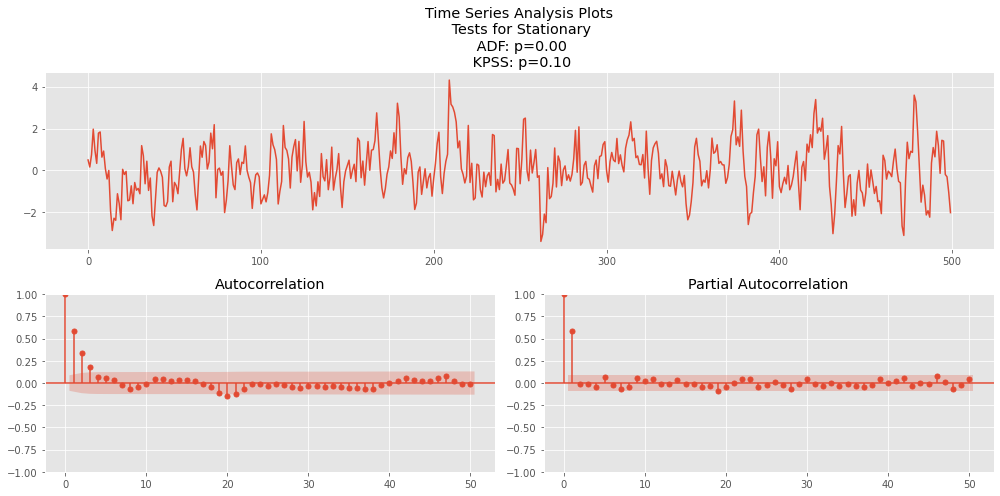

In [5]:
# Let's generate AR(1) dataset using 0.6, plot, and test
ar = 0.6
ma = 0  # set to zero to remove any moving average effect from the time series signal
ar1_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ar1_data, 50)
ts.plot_test()

Above details is for $AR(1)$ scenario with serial correlation defined for the previous lag as $0.6.\;$$MA$ is set to $0$ to eliminate any moving average effect.

In [6]:
# Let's try to build AR(1) model, will discuss this in detail in our ARIMA model
model = sm.tsa.ARIMA(ar1_data.tolist(), order=(1, 0, 0), trend='n').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -699.638
Date:                Sat, 19 Nov 2022   AIC                           1403.276
Time:                        13:18:57   BIC                           1411.705
Sample:                             0   HQIC                          1406.583
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5877      0.037     16.041      0.000       0.516       0.660
sigma2         0.9606      0.057     16.808      0.000       0.849       1.073
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.86   Prob(JB):                         0.12
Heteroskedasticity (H):               1.18   Skew:                             0.18
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                 -43.444501
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic            0.112034
p-value                   0.100000
Lags Used                24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


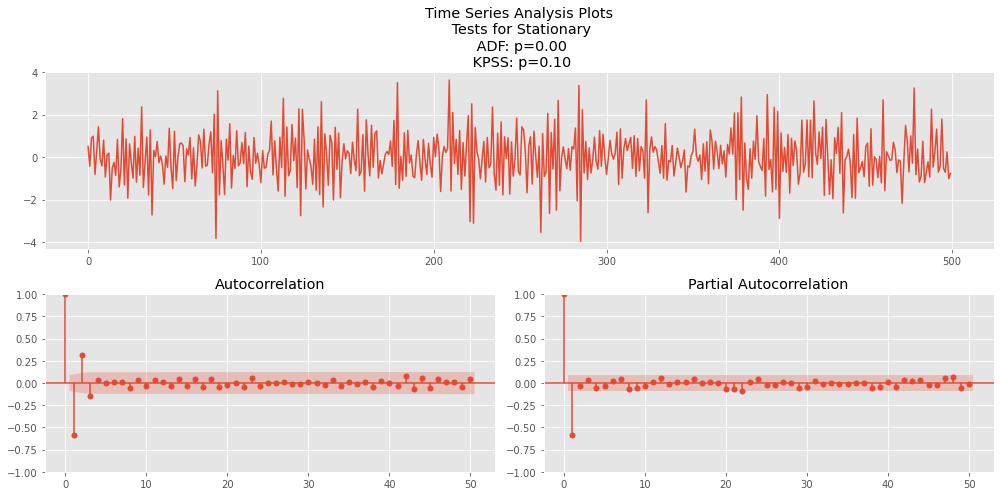

In [7]:
# Let's generate AR(1) dataset using -0.6, plot, and test
ar = -0.6
ma = 0  # set to zero to remove any moving average effect from the time series signal
ar1_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ar1_data, 50)
ts.plot_test()

What do you think will happen if we increase $\phi$ to 1.0?


Results of Dickey-Fuller Test:
Output(using Test Statistic): NON-Stationary with 99% confidence. 
Output(using p-value): NOT STATIONARY!
Test Statistic                  -1.498630
p-value                          0.534189
#Lags Used                       0.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): NON-Stationary with 99% confidence. 
Output(using p-value): NOT STATIONARY!
Test Statistic            2.87942
p-value                   0.01000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


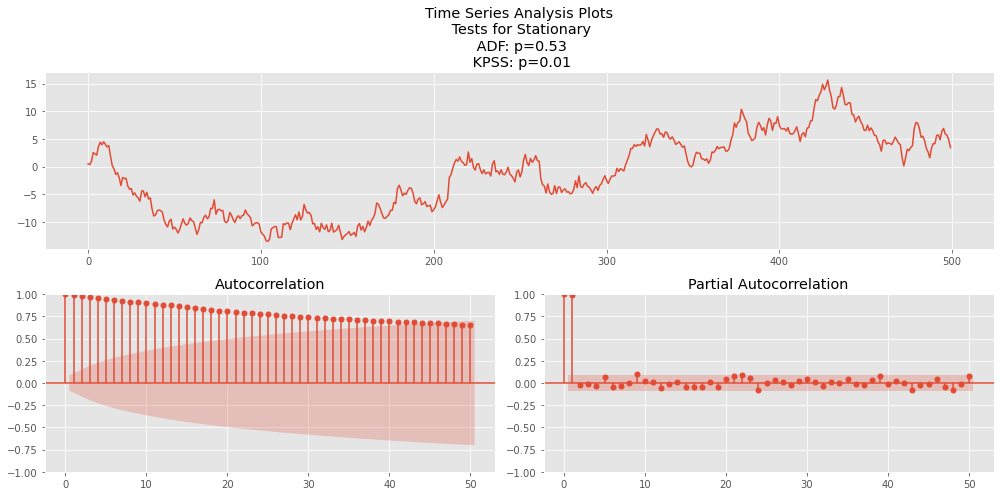

In [8]:
# Let's generate AR(1) dataset using 1, plot, and test
ar = 1
ma = 0  #set to zero to remove any moving average effect from the time series signal
ar1_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ar1_data, 50)
ts.plot_test()

The model now goes toward non-stationarity. Hence in summary for $AR(1)$ model, below are the observations:
- when $\phi_1 = 0, y_t$ is equivalent to white noise;
- when $\phi_1 = 1,\;$and$\;c=0, y_t$ is equivalent to random walk;
- when $\phi_1 = 1,\;$and$\;c\neq0, y_t$ is equivalent to random walk with drift;
- when $\phi_1 < 0, y_t$ tends to oscillate around mean.

We usually restrict autoregressive models for stationary time series, which means the following:
- For an $AR(1)$ model: $-1<\phi_1<1$

This time let's do $AR(2)$ model  

\begin{equation}
y_t = \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \epsilon_{t}
\end{equation}

- For an $AR(2)$ model: $-1<\phi_2<1, \phi_1 + \phi_2 < 1, \phi_1-\phi_0 < 1$


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                 -43.813267
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic            0.073833
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


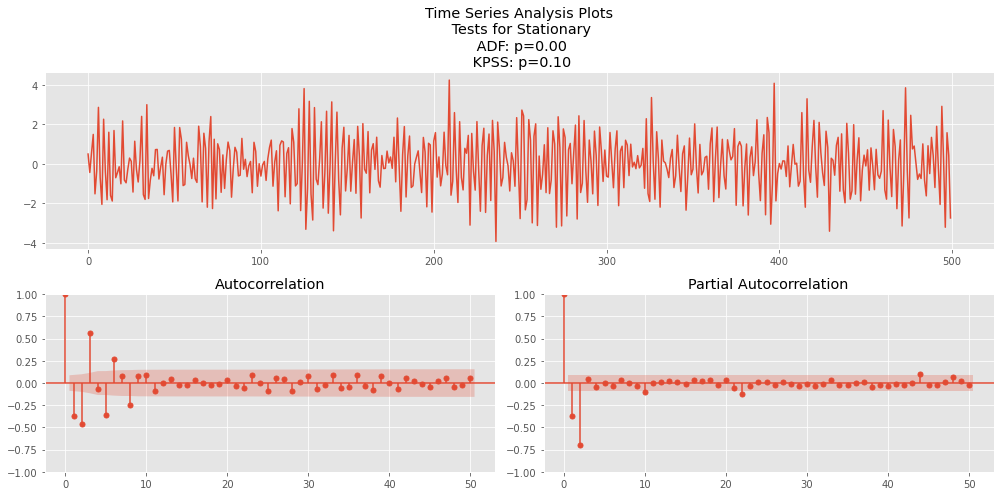

In [9]:
# Let's generate AR(2) dataset using -0.6 and -0.7, plot, and test
ar = [-0.6, -0.7]
ma = 0  #set to zero to remove any moving average effect from the time series signal
ar2_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ar2_data, 50)
ts.plot_test()

As shown above, it means current values are predicted based only on previous values. $AR(1)$ autoregressive processes depend on the value immediately preceding the current value. Moreover, $AR(2)$ uses the previous two values to calculate the current value. Having said that, $AR(0)$ processes white noise, which does not depend on terms. This assumes that the fundamentals will be same.

## Moving Average (MA)


Just like what we did in AR, we now derive the conditions that the parameters $\mathcal{m}_1,\mathcal{m}_2,\dots, \mathcal{m}_q$ must satisfy to ensure the invertbility of the $MA(q)$ process:

\begin{equation}
\begin{aligned}
\tilde{z}_{t}  &=  a_{t} - \mathcal{m}_{1}a_{t-1}- \dots -\mathcal{m}_{q}a_{t-q}\\
&= (1- \mathcal{m}_{1}\mathbf{B}- \dots - \mathcal{m}_{q}\mathbf{B}^q)a_{t}\\
&= \mathcal{m}(\mathbf{B})a_{t}
\end{aligned}
\end{equation}


Based on the above, $y_t$ is an _moving average_ process of order $q$ if $y_t$ follows:  

\begin{equation}
y_t = c + \mathcal{m}_{1}\epsilon_{t-1} +\;\dots \;+\mathcal{m}_{q}\epsilon_{t-q} + \epsilon_{t}
\end{equation}

Rewriting again with the use of backshift operator  $\mathbf{B}$ and the associated $MA$ polynomial
\begin{equation}
\begin{aligned}
\mathcal{m}(\mathbf{B}) &= (1 + \mathcal{m}_{1}\mathbf{B}+\mathcal{m}_{2}\mathbf{B}^2-\;\dots \;+\mathcal{m}_{q}\mathbf{B}^q)\\
\mathcal{m}(z) &= 1 + \mathcal{m}_{1}{z}+\;\dots \;+\mathcal{m}_{q}{z}^q = \sum_{j=0}^q{\mathcal{m}_jz^j},\qquad \mathcal{m}_q\neq 0
\end{aligned}
\end{equation}

Let's implement a simple example of an $MA(1)$ model  

\begin{equation}
y_t = c + \mathcal{m}_{1}\epsilon_{t-1} + \epsilon_{t}
\end{equation}


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                -8.735867e+00
p-value                        3.101626e-14
#Lags Used                     5.000000e+00
Number of Observations Used    4.940000e+02
Critical Value (1%)           -3.443657e+00
Critical Value (5%)           -2.867408e+00
Critical Value (10%)          -2.569896e+00
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.117756
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


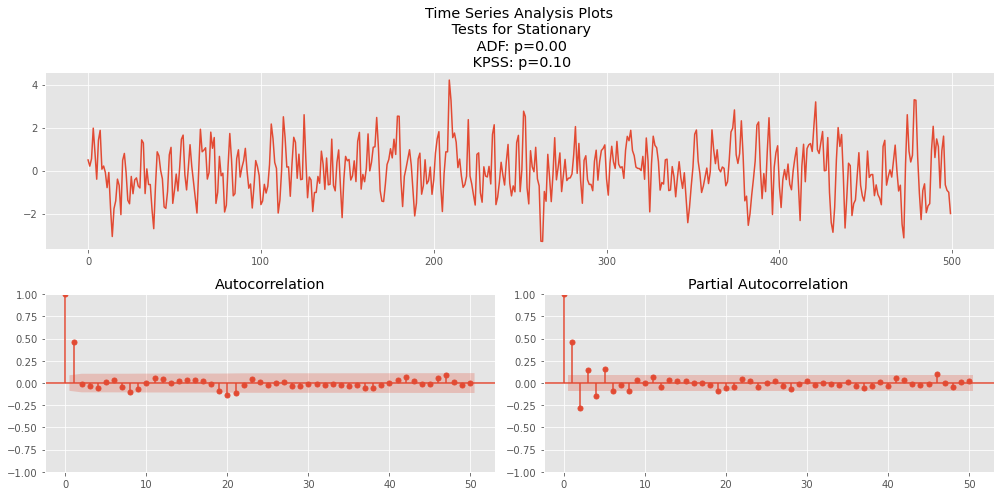

In [10]:
# Let's generate MA(1) dataset using 0.7, plot, and test
ar = 0 #set to zero
ma = 0.7  
ma1_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ma1_data, 50)
ts.plot_test()

In [11]:
# Let's try to build MA(1) model, will discuss this in detail in our ARIMA model
model = sm.tsa.ARIMA(ma1_data.tolist(), order=(0, 0, 1), trend='n').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -699.603
Date:                Sat, 19 Nov 2022   AIC                           1403.205
Time:                        13:19:02   BIC                           1411.634
Sample:                             0   HQIC                          1406.513
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7231      0.031     23.197      0.000       0.662       0.784
sigma2         0.9599      0.057     16.787      0.000       0.848       1.072
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.57   Prob(JB):                         0.11
Heteroskedasticity (H):               1.17   Skew:                             0.18
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, let's see the impact of the $MA$ component of **ACF** and **PACF** with a higher order of $q$


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                -7.550490e+00
p-value                        3.198499e-11
#Lags Used                     7.000000e+00
Number of Observations Used    4.920000e+02
Critical Value (1%)           -3.443711e+00
Critical Value (5%)           -2.867432e+00
Critical Value (10%)          -2.569908e+00
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.124638
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


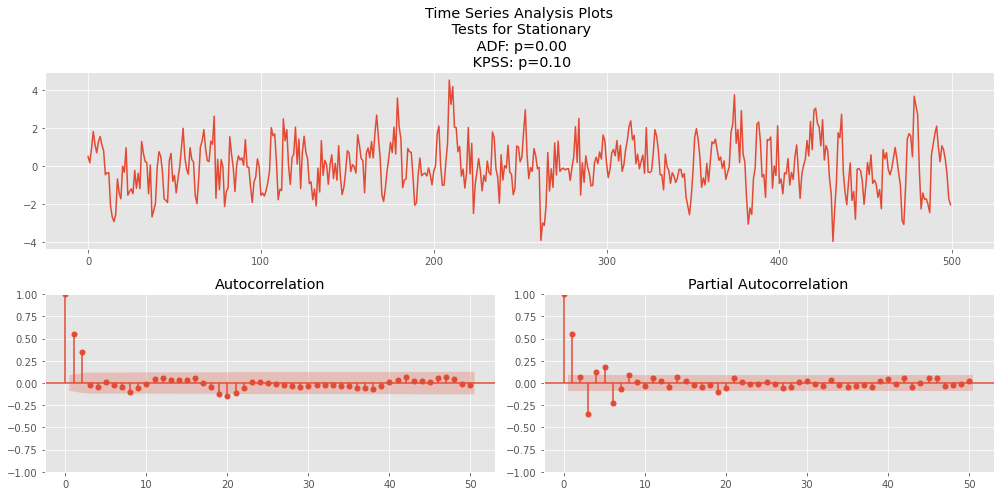

In [12]:
# Let's generate MA(2) dataset using 0.6, 0.7, plot, and test
ar = 0  # set to zero
ma = [0.6, 0.7]
ma2_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ma2_data, 50)
ts.plot_test()

In $MA$, the invertibility constraints for other models are similar to the stationarity constraints such that:
- For an $MA(1)$ model: $-1<\mathcal{m}_1 <1$
- For an $MA(2)$ model: $-1<\mathcal{m}_2<1, \mathcal{m}_1 + \mathcal{m}_2 > -1, \mathcal{m}_1-\mathcal{m}_2 < 1$

## Autoregressive Moving Average (ARMA)

In our discussions, we note that to achieve parsimony it may be necessary to include both autoregressive and moving average terms. Hence:

\begin{equation}
\begin{aligned}
\tilde{z}_{t}  &=  \phi_{1}\tilde{z}_{t-1} + \dots + \phi_{p}\tilde{z}_{t-p} + a_{t} - \mathcal{m}_{1}a_{t-1}- \dots -\mathcal{m}_{q}a_{t-q}\\
(1 -\phi_{1}\mathbf{B}-\phi_{2}\mathbf{B}^2-\;\dots \;-\phi_{p}\mathbf{B}^p)\tilde{z}_{t} &= (1- \mathcal{m}_{1}\mathbf{B}-\mathcal{m}_{2}\mathbf{B}^2- \dots - \mathcal{m}_{q}\mathbf{B}^q)a_{t}\\
\phi(\mathbf{B})\tilde{z}_{t} &= \mathcal{m}(\mathbf{B})a_{t}
\end{aligned}
\end{equation}

where $\phi(\mathbf{B})$ and $\mathcal{m}(\mathbf{B})$ are polynomial operators in $\mathbf{B}$ of degrees $𝑝$ and $𝑞$.

This came from the **auto-regressive model $AR(p)$**, which regresses on its own lagged terms and **moving average model $MA(q)$** that builds a function of error terms of the past. The $AR(p)$ models tend to capture the mean reversion effect whereas $MA(q)$ models tend to capture the shock effect in error ,which are not normal or unpredicted events. 

Hence, combining the power of $AR$ and $MA$ components together, we have $ARMA$ model. An $ARMA(p, q)$ time series forecasting model incorporates the $p$th order $AR$ and $q$th order $MA$ model, respectively defined by:

\begin{equation}
\begin{aligned}
ARMA &= AR + MA\\
y_t &= c + \phi_{1}y_{t-1} + \dots  +\phi_{p}y_{t-p} +  \mathcal{m}_1\epsilon_{t-1} + \dots  + \mathcal{m}_q\epsilon_{t-q} + \epsilon_t
\end{aligned}
\end{equation}

where $\phi$ and $\mathcal{m}$ represent $AR$ and $MA$ coefficients. The $c$ and $\epsilon_t$ captures the intercept and error at time $t$

Here, $ARMA(p, q)$ model:\
$p$ is order of $AR$ part\
$q$ is order of $MA$ part

Using again backshift operator $\mathbf{B}$, this can be rewritten as:
\begin{equation}
\begin{aligned}
\phi(\mathbf{B})y_t &= \mathcal{m}(\mathbf{B})\epsilon_t
\end{aligned}
\end{equation}
with the characteristic polynomials as defined above.

*Note: Both the $AR$ polynomial and the $MA$ polynomial should not have any common factors. This will ensure that there is no* **parameter redundancy.**

A mixed $ARMA$ process of considerable practical importance is the $ARMA(1, 1)$ process

\begin{equation}
\begin{aligned}
\tilde{z}_{t} -\phi_{1}\tilde{z}_{t-1} &=  a_{t}- \mathcal{m}_{1}a_{t-1}\\
(1 -\phi_{1}\mathbf{B})\tilde{z}_{t} &= (1- \mathcal{m}_{1}\mathbf{B})a_{t}
\end{aligned}
\end{equation}

Note:
- process is **stationary** if $−1 < \phi_{1} < 1$
- **invertible** if $−1 < \mathcal{m}_{1} < 1$

Let's implement $ARMA(1,1)$  model


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                -1.674923e+01
p-value                        1.338237e-29
#Lags Used                     1.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.100201
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


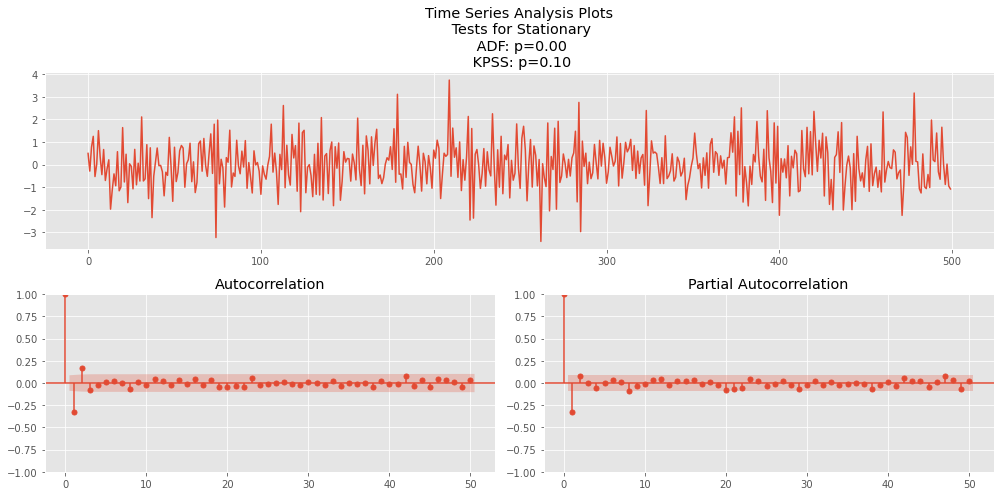

In [13]:
ar = -0.6
ma = 0.3
ar1ma1_data = ts.gen_arma_data(ar, ma)
ts = UniTS_Toolbox(ar1ma1_data, 50)
ts.plot_test()

There are multiple scenarios to select $p$ and $q$.
Some of the thumb rules that can be used to determine the order of $ARMA$ components:
1. Autocorrelation is exponentially decreasing and **PACF** has significant correlation at lag 1, then use the $p$ parameter
2. Autocorrelation is forming a sine-wave and **PACF** has significant correlation at lags 1 and 2, then use *second-order value* for $p$
3. Autocorrelation has significant autocorrelation and **PACF** has exponential decay, then moving average is present and the $q$ parameter needs to be set up
4. Autocorrelation shows significant serial correlation and the **PACF** shows sine- wave pattern, then set up a moving average $q$ parameter


<h3 style="text-align:center;">Table 1. Summary of ACF and PACF Interpretation</h3>
    <table class='table table-striped'>
    <table style='margin: 0 auto'>
        <thead>
            <tr bgcolor="022ec8">
                <th style="color:white; text-align:center;font-size:12pt;width:30%">ACF Plot Behaviour</th>
                <th style="color:white; text-align:center;font-size:12pt;width:30%">PACF Plot Behaviour</th>
                <th style="color:white; text-align:center;font-size:12pt;width:40%">Recommended Model</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="text-align:center;">Declines gradually</td>
                <td style="text-align:center;">Drops instantly</td>
                <th style="text-align:center;">AR</th>
            </tr>
            <tr>
                <td style="text-align:center;">Drops instantly</td>
                <td style="text-align:center;">Declines gradually</td>
                <th style="text-align:center;">MA</th>
            </tr>
            <tr>
                <td style="text-align:center;">Declines gradually</td>
                <td style="text-align:center;">Declines gradually</td>
                <th style="text-align:center;">ARMA</th>
            </tr>
            <tr>
                <td style="text-align:center;">Drops instantly</td>
                <td style="text-align:center;">Drops instantly</td>
                <th style="text-align:center;">No Model</th>
            </tr>
        </tbody>
    </table>

Aside from the above, the constant $c$ has an important effect on the long-term forecasts obtained from these models.

<h3 style="text-align:center;">Table 2. Summary of Long Term Forecast based on Constant $c$</h3>
    <table width="80%">
    <table class='table table-striped'>
            <table style='margin: 0 auto'>
        <thead>
          <tr bgcolor="022ec8">
                <th style="color:white; text-align:center;font-size:12pt;width:30%" >$c$</th>
                <th style="color:white; text-align:center;font-size:12pt;width:30%">$d$</th>
                <th style="color:white; text-align:center;font-size:12pt;width:40%">Long-term Forecasts Behavior</th>
          </tr>
        </thead>
        <tbody>
        <tr>
            <td style="text-align:center">0</td>
            <td style="text-align:center">0</td>
            <th style="text-align:center">will go to zero</th>
        </tr>
        <tr>
            <td style="text-align:center">0</td>
            <td style="text-align:center">1</td>
            <th style="text-align:center">will go to a non-zero constant</th>
        </tr>
        <tr>
            <td style="text-align:center">0</td>
            <td style="text-align:center">2</td>
            <th style="text-align:center">will follow a straight line</th>
        </tr>
        <tr>
            <td style="text-align:center">not equal to $0$</td>
            <td style="text-align:center">0</td>
            <th style="text-align:center">will go to the mean of the data</th>
        </tr>
        <tr>
            <td style="text-align:center">not equal to $0$</td>
            <td style="text-align:center">1</td>
            <th style="text-align:center">will follow a straight line</th>
        </tr>
         <tr>
            <td style="text-align:center">not equal to $0$</td>
            <td style="text-align:center">2</td>
            <th style="text-align:center">follow a quadratic trend</th>
        </tr>
        </tbody>
</table>

# Baseline Methods

Before furthering to linear models, as part of the performance measurement, it's always necessary to compare with the baseline. And sometimes one of the following simple methods will be the best forecasting method available. Although in many cases, these methods will serve as benchmarks rather than the method of choice. That is, any forecasting methods we develop will be compared to these simple methods to ensure that the new method is better than these simple alternatives. Else, the new method is not worth considering.

## Average Method

For this method, the forecasts of all future values are equal to the average (or “mean”) of the historical data.
If we let the historical data be denoted by $y_1,\dots\,y_T$, then we can write the forecasts as

\begin{equation}
\hat{y}_{T+h|T} = \bar{y} = (y_1 + \dots +y_T)/T
\end{equation}

The notation $\hat{y}_{T+h|T}$ is a short-hand for the estimate of $y_{T+h}$ based on the data $y_1,\dots\,y_T$.

## Naïve Method

In the Naïve model, the forecasts for every horizon correspond to the last observed value. That is,

\begin{equation}
\hat{y}_{T+h|T} = y_T
\end{equation}

This kind of forecast assumes that the stochastic model generating the time series is a **random walk**.

## Seasonal Naïve

In this case, we set each forecast to be equal to the last observed value from the same season. Assuming that the time series has a seasonal component and that the period of the seasonality is $T$, the forecasts given by the SNaïve model are given by:

\begin{equation}
\hat{y}_{T+h|T} = y_{T+h-m(k+1)}
\end{equation}

where

$m=$ the seasonal period\
$k$ is the integer part of $(h−1)/m$ (i.e., the number of complete years in the forecast period prior to time $T+h$)

For example, with monthly data, the forecast for all future February values is equal to the last observed February value. With quarterly data, the forecast of all future $Q2$ values is equal to the last observed $Q2$ value (where $Q2$ means the second quarter). Similar rules apply for other months and quarters, and for other seasonal periods.

# Linear Models

In this portion, we will discuss the general linear stochastic model that assumes that the time series is generated by a linear aggregation of random shocks. Let us consider below time series data.

![TimeSeries](time-series-examples.png)

Nejad, A. (2021, March 13). Introduction to time series - trend decomposition with python. Medium. Retrieved October 3, 2022, from https://medium.com/quantjam/introduction-to-time-series-trend-decomposition-with-python-b54a29f8e038

## Autoregressive Integrated Moving Average (ARIMA)

Given that we combine the **differencing** with **autoregression** and a **moving average** model, we will come up with a non-seasonal $ARIMA$ model. $ARIMA$ is can be written as

\begin{equation}
y'_t = c + \phi_{1}y'_{t-1} + \dots  +\phi_{p}y'_{t-p} +  \mathcal{m}_1\epsilon_{t-1} + \dots  + \mathcal{m}_q\epsilon_{t-q} + \epsilon_t
\end{equation}

Rewriting again with the use of backshift operator  $\mathbf{B}$,

\begin{equation}
(1 -\phi_{1}\mathbf{B}-\;\dots \;-\phi_{p}\mathbf{B}^p)(1-\mathbf{B})^dy_{t} = c + (1 + \mathcal{m}\mathbf{B}+ \dots + \mathcal{m}_{q}\mathbf{B}^q)\epsilon_{t}
\end{equation}

\begin{equation}
\begin{aligned}
\Uparrow\hspace{4em}\Uparrow\hspace{7em}\Uparrow
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\hspace{5em}AR(p)\hspace{2em}\mathit{d}\;\mathtt{differences}\hspace{2em}MA(q)\hspace{5em}
\end{aligned}
\end{equation}

where $y'_t$ is the differenced series (could have been differenced more than once). The **“predictors”** on the right hand side include both lagged values of $y'_t$ and lagged errors. This an $ARIMA(p,d,q)$ model, where

$p$ is the order of the autoregressive part\
$d$ is the degree of first differencing involved\
$q$ is the order of the moving average part





<h3 style="text-align:center;">Table 3. Special Cases of ARIMA Models</h3>
<table style="width:100%">
<table class='table table-striped'>
<table style='margin: 0 auto'>
    <thead>
        <tr bgcolor="022ec8">
            <th style="color:white; text-align:center;font-size:12pt;width:30%">Models</th>
            <th style="color:white; text-align:center;font-size:12pt;width:70%">ARIMA Model</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:center;">White noise</td>
            <th style="text-align:center;">ARIMA (0,0,0)</th>
        </tr>
        <tr>
            <td style="text-align:center;">Random walk</td>
            <th style="text-align:center;">ARIMA (0,1,0) with no constant</th>
        </tr>
        <tr>
            <td style="text-align:center;">Random walk with drift</td>
            <th style="text-align:center;">ARIMA (0,1,0) with a constant</th>
        </tr>
        <tr>
            <td style="text-align:center;">Autoregression</td>
            <th style="text-align:center;">ARIMA (p,0,0)</th>
        </tr>
        <tr>
            <td style="text-align:center;">Moving average</td>
            <th style="text-align:center;">ARIMA (0,0,q)</th>
        </tr>
    </tbody>
</table>

The objective, therefore, is to identify the values of $p$, $d$ and $q$. But how?

Let's use the following $3$ Steps:

1. Manually Configure the ARIMA
2. Automatically Configure the ARIMA
3. Review Residual Errors

### Manually Configure $ARIMA$

Analysis of the time series data assumes that we are working with a stationary time series but this is not the reality, most of them are non-stationary. Hence, we can make it stationary by first differencing the series and using ADF and KPSS tests to confirm that the result is stationary. Let's see the process below.

Before dwelling into data analysis, let's process the data using our `toolbox` and function `preprocess_dataset`

In [14]:
# Dataset from https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set?
#select=household_power_consumption.txt
df_power_consumption = ts.preprocess_dataset(CSV_PATH)

Let's plot normal graph for power consumption.

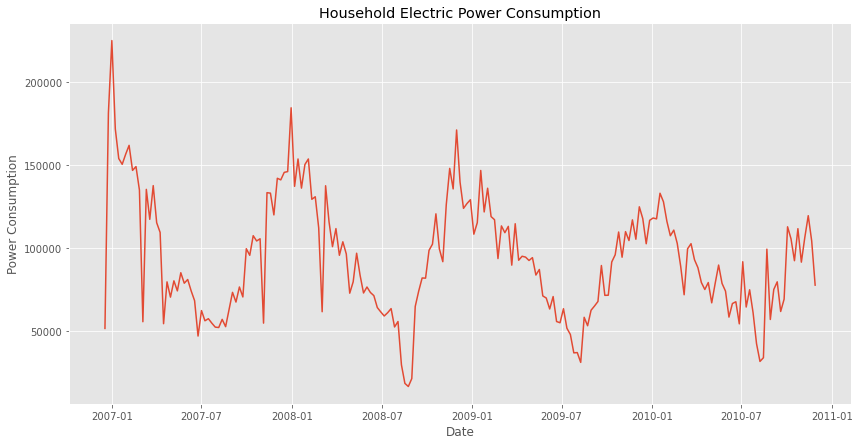

In [15]:
plt.figure(figsize=FIGSIZE)
plt.title("Household Electric Power Consumption")
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.plot(df_power_consumption, label='Power_Consumption')
plt.show()

In [16]:
# Plotting the column using our plotly function from our class toolbox
ts.plot_it(df_power_consumption.index,
           df_power_consumption,
           x_title='Date',
           y_title='Power Consumption',
           title='Household Electric Power Consumption',
           mode='lines')

#### Find the order differencing $d$
Now, this time, let's use the `differencing` function that outputs the differenced dataset to find $d$.


Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                  -4.451447
p-value                          0.000240
#Lags Used                      11.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.185401
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


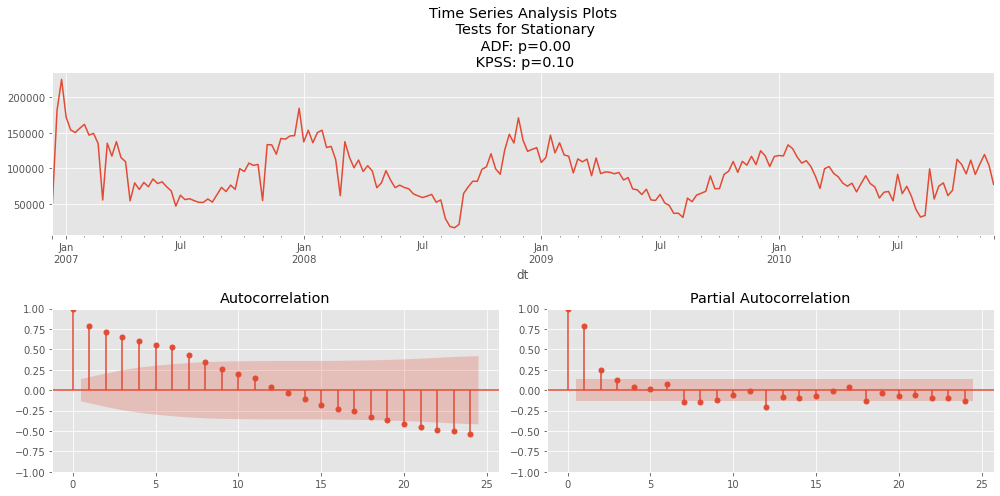

In [17]:
ts_data = df_power_consumption
ts = UniTS_Toolbox(ts_data)
ts.plot_test()

Both tests (`ADF` & `KPSS`) indicate that data is stationary. If the results was not stationary, we can perform differencing that can be done repeatedly until our time series become stationary.

Let's do `Manual Differencing`, we will use our `Class Toolbox differencing` function that manually calculate the difference of our time series.


Statistic for (Original)

Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                  -4.451447
p-value                          0.000240
#Lags Used                      11.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64

Results of KPSS Test:
Output(using Test Statistic): STATIONARY!
Output(using p-value): STATIONARY!
Test Statistic           0.185401
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Statistic for (1st Order)

Results of Dickey-Fuller Test:
Output(using Test Statistic): STATIONARY! 
Output(using p-value): STATIONARY!
Test Statistic                  -5.003116
p-value                

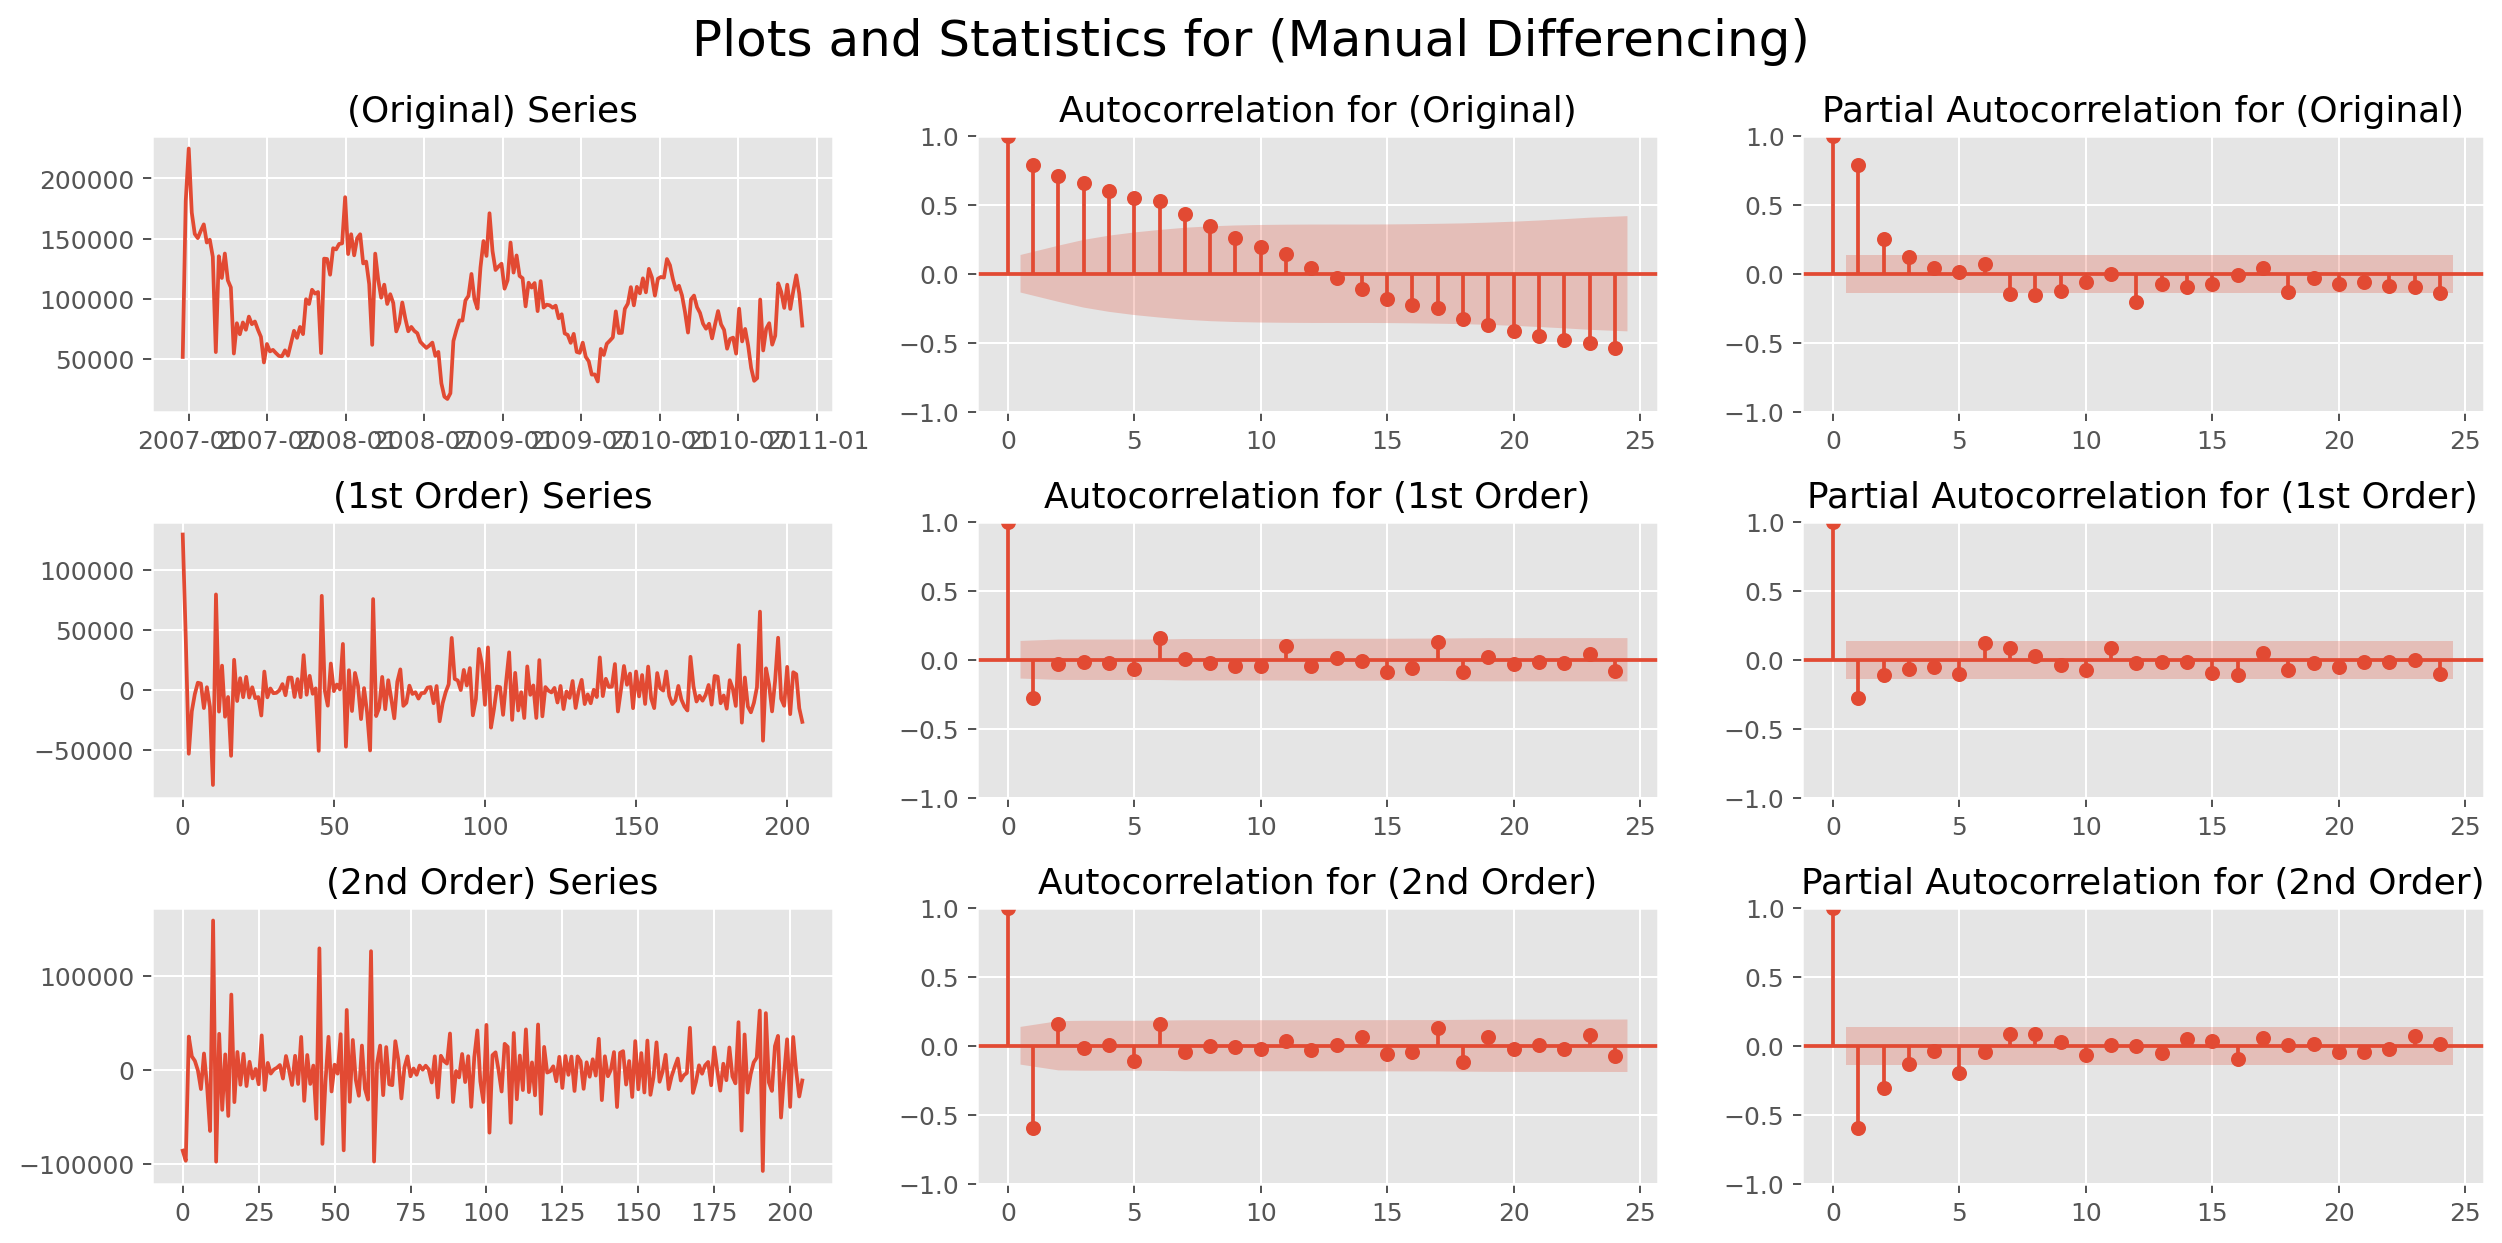

In [18]:
# For Manual Differencing
original = ts_data
first_diff_manual = ts.differencing(original)
second_diff_manual = ts.differencing(first_diff_manual)

# Perform stationarity_test using Manual Differencing
ts.stationarity_test(original=original,
                  first_diff=first_diff_manual,
                  second_diff=second_diff_manual,
                  method='Manual Differencing')

Given the results of our ACF and ADF, as well as the `Autocorrelation` & `Partial Autocorrelation`, show that our time series is stationary even without the differencing. Hence, we will consider the `Original` series for our ARIMA models, $d=0$.

#### Find the order of the AutoRegressive term $p$

Per our discussion, the $PACF$ plot is used to determine the lag for our $AR$ terms since it's the correlation between the series and its lag, after excluding the contributions from the intermediate lags.

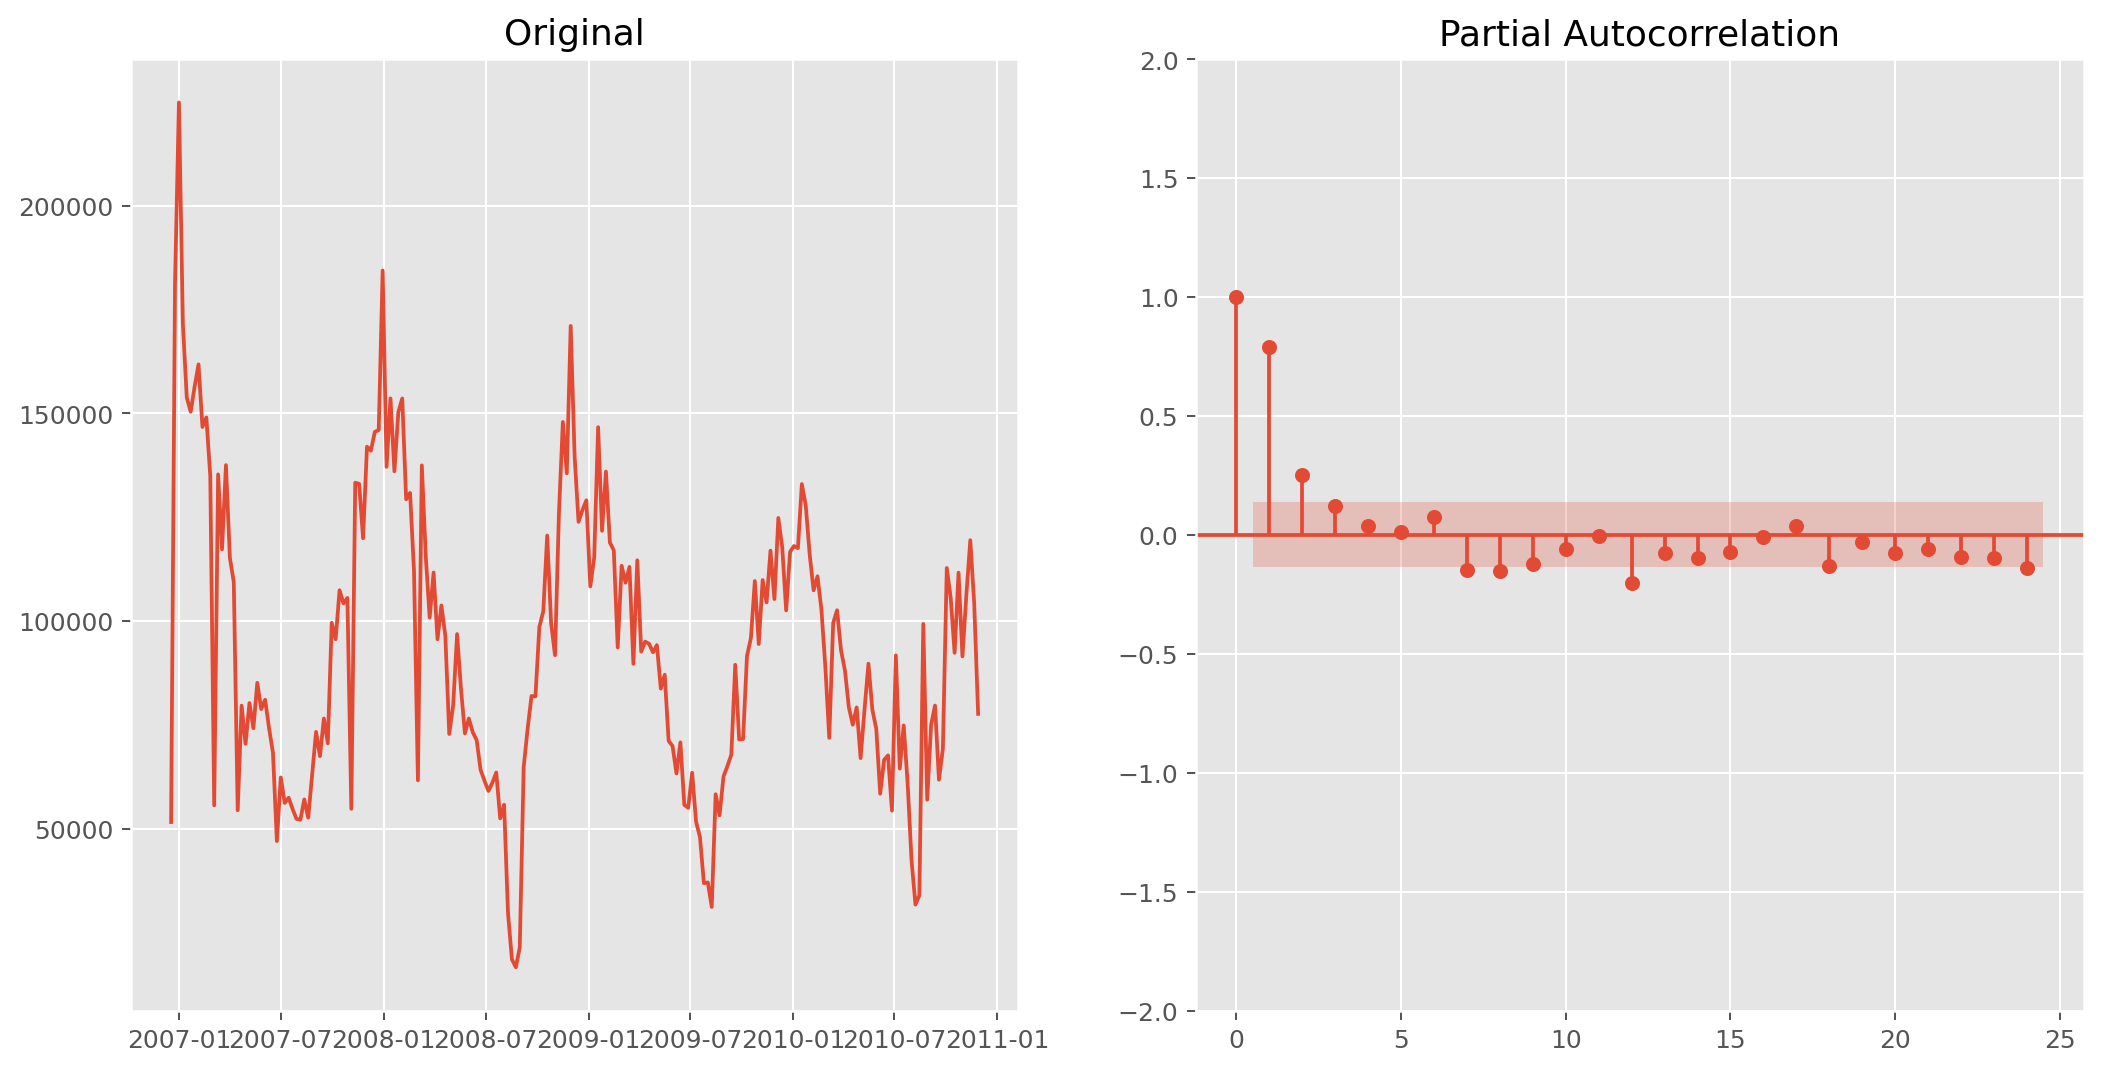

In [19]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': FIGSIZE, 'figure.dpi': FIGDPI})
fig, axes = plt.subplots(1, 2)
axes[0].plot(ts_data)
axes[0].set_title(ORIGINAL_NAME)
plot_pacf(ts_data.dropna(), ax=axes[1])
axes[1].set(ylim=(-2,2))
plt.show()

Based on the above, we can see that our $PACF$ returns significance at $Lag = 2$. 
With this, we can now decide to use $p = 2$ for our ARIMA model.

#### Find the order of the Moving Average term $q$

Simillar to how we determined $p$, we will now look at the $ACF$ to determine the $q$ terms to be considered for our $MA$. The $ACF$ tells how many $MA$ terms are required to remove any autocorrelation in the stationary series.

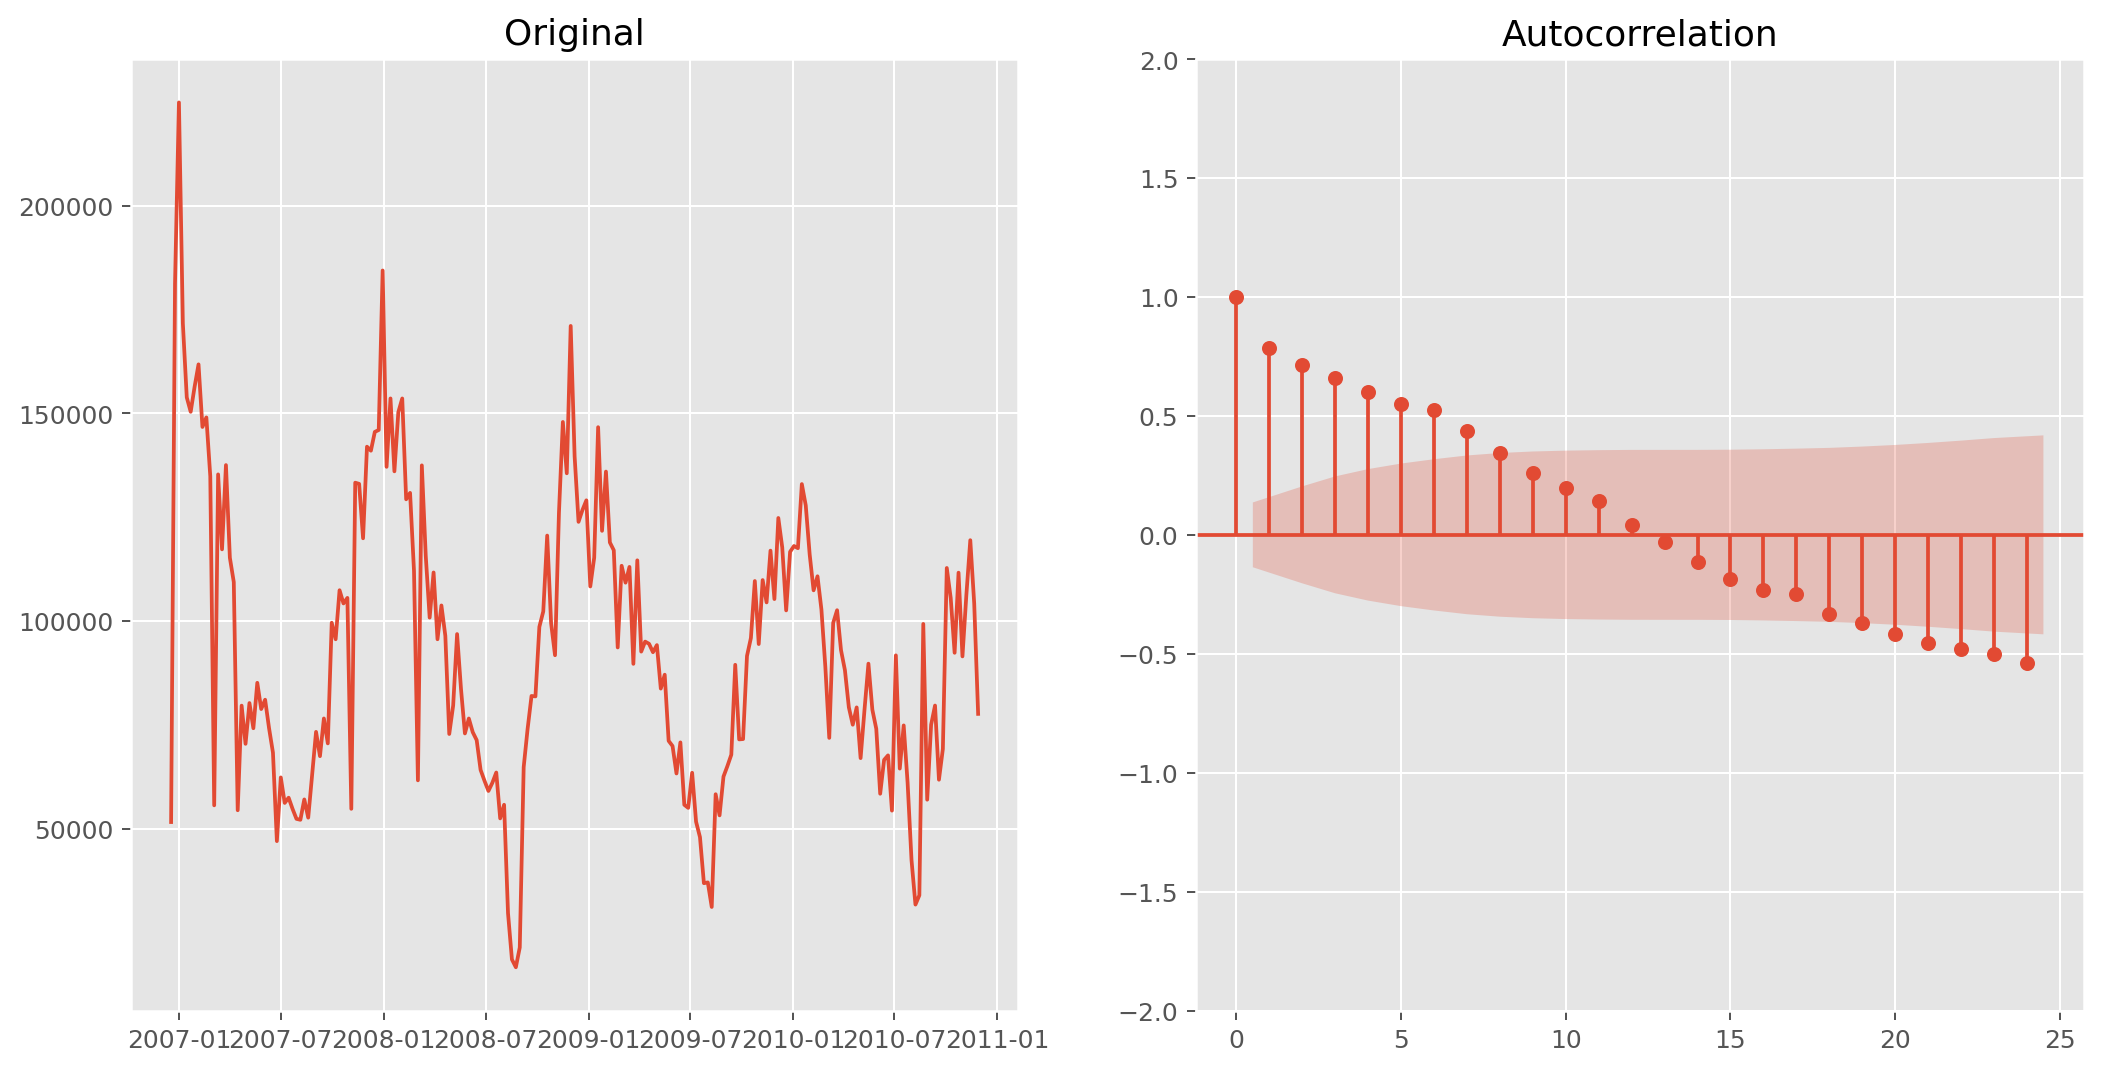

In [20]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': FIGSIZE, 'figure.dpi': FIGDPI})
fig, axes = plt.subplots(1, 2)
axes[0].plot(ts_data)
axes[0].set_title(ORIGINAL_NAME)
plot_acf(ts_data.dropna(), ax=axes[1])
axes[1].set(ylim=(-2, 2))
plt.show()

Based on the above results, damped sinusoidal function, hence, we consider $q = 0$. Now, this analysis suggests an $ARIMA(2,0,0)$ on the stationary data that may be a good starting point. The next step is to build the $ARIMA$ model.

#### Build the ARIMA model

We import the $ARIMA$ model and initialize as follows:

In [21]:
model = ARIMA(ts_data, order=(2,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      power_consumption   No. Observations:                  207
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2353.036
Date:                Sat, 19 Nov 2022   AIC                           4714.072
Time:                        13:19:26   BIC                           4727.402
Sample:                    12-17-2006   HQIC                          4719.462
                         - 11-28-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.354e+04   6796.090     13.764      0.000    8.02e+04    1.07e+05
ar.L1          0.5939      0.027     21.671      0.000       0.540       0.648
ar.L2          0.2416      0.035      6.874      0.000       0.173       0.310
sigma2      3.617e+08      1.515   2.39e+08      0.000    3.62e+08    3.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               468.18
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+24. Standard errors may be unstable.
"""

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under **coef** are the weights of the respective terms. The $P$ values of other terms have improved and are highly significant $(<< 0.05)$.

### Automatically Configure the ARIMA using Auto Arima

In Python, the `pmdarima` package provides `auto_arima()` function which can be used to automate the process of ARIMA Forecasting. The `auto_arima()` uses a stepwise approach to search multiple combinations of $p$,$d$,$q$ parameters and chooses the best model that has the least $AIC$.

*Note: We need to install the pmdarima package first through `!pip install pmdarima`*.

In [79]:
model = pm.auto_arima(
    ts_data,
    start_p=1,
    start_q=1,
    test='adf',  # use adftest to find optimal 'd'
    max_p=10,
    max_q=10,  # maximum p and q
    m=1,  # frequency of series
    d=None,  # let model determine 'd'
    seasonal=False,  # No Seasonality
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4723.800, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4716.515, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4715.056, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4723.028, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4714.524, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.248 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  207
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2356.262
Date:                Sun, 20 Nov 2022   AIC                           4714.524
Time:                        12:18:23   BIC                           4717.852
Sample:                    12-17-2006   HQIC                          4715.870
                         - 11-28-2010                                       

Through this `auto_arima()` function, we got `Best model: ARIMA(0,1,0)(0,0,0)[0]`.

In [23]:
# Best model:  ARIMA(0,1,0)(0,0,0)[0]  
selected_val = (0,1,0)
model = ARIMA(ts_data, order=selected_val)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      power_consumption   No. Observations:                  207
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2356.262
Date:                Sat, 19 Nov 2022   AIC                           4714.524
Time:                        13:19:26   BIC                           4717.852
Sample:                    12-17-2006   HQIC                          4715.870
                         - 11-28-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.017e+08   2.32e+07     21.593      0.000    4.56e+08    5.47e+08
===================================================================================
Ljung-Box (L1) (Q):                  15.82   Jarque-Bera (JB):               468.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Having said that, `ARIMA(1,1,1)` $AIC$ is higher compared to `ARIMA(0,1,0)` and `ARIMA(2,0,0)` hence we will use `ARIMA(1,1,1)`.

In [52]:
selected_val = (1, 1, 1)
model = ARIMA(ts_data, order=selected_val)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      power_consumption   No. Observations:                  207
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2356.718
Date:                Sat, 19 Nov 2022   AIC                           4719.436
Time:                        14:53:20   BIC                           4729.420
Sample:                    12-17-2006   HQIC                          4723.474
                         - 11-28-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3595      0.117      3.081      0.002       0.131       0.588
ma.L1         -0.6154      0.118     -5.225      0.000      -0.846      -0.385
sigma2      3.361e+08   1.56e-09   2.16e+17      0.000    3.36e+08    3.36e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               823.01
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.49e+32. Standard errors may be unstable.
"""

Let's also use `ARIMA_grid_search` function to find the best model based on the above findings.

In [77]:
p_values = range(0, 20) # based on PACF
d_values = range(0, 1) # based on differencing degree
q_values = range(0, 1) # based on ACF
ts.ARIMA_grid_search(ts_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=25421.949
ARIMA(1, 0, 0) RMSE=18526.095
ARIMA(2, 0, 0) RMSE=17976.909
ARIMA(3, 0, 0) RMSE=17677.566
ARIMA(4, 0, 0) RMSE=17741.701
ARIMA(5, 0, 0) RMSE=17796.958
ARIMA(6, 0, 0) RMSE=17703.997
ARIMA(7, 0, 0) RMSE=18064.891
ARIMA(8, 0, 0) RMSE=17261.132
ARIMA(9, 0, 0) RMSE=17667.212
ARIMA(10, 0, 0) RMSE=17633.642
ARIMA(11, 0, 0) RMSE=17806.717
ARIMA(12, 0, 0) RMSE=18543.585
ARIMA(13, 0, 0) RMSE=18633.459
ARIMA(14, 0, 0) RMSE=18746.943
ARIMA(15, 0, 0) RMSE=18867.382
ARIMA(16, 0, 0) RMSE=18919.968
ARIMA(17, 0, 0) RMSE=19174.322
ARIMA(18, 0, 0) RMSE=18778.610
ARIMA(19, 0, 0) RMSE=18700.984
Best ARIMA(8, 0, 0) RMSE=17261.132


In [53]:
selected_val = (8, 0, 0)
model = ARIMA(ts_data, order=selected_val)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      power_consumption   No. Observations:                  207
Model:                 ARIMA(8, 0, 0)   Log Likelihood               -2347.604
Date:                Sat, 19 Nov 2022   AIC                           4715.207
Time:                        14:53:37   BIC                           4748.534
Sample:                    12-17-2006   HQIC                          4728.684
                         - 11-28-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.354e+04   7028.680     13.308      0.000    7.98e+04    1.07e+05
ar.L1          0.5358      0.032     16.617      0.000       0.473       0.599
ar.L2          0.1905      0.063      3.022      0.003       0.067       0.314
ar.L3          0.0850      0.080      1.060      0.289      -0.072       0.242
ar.L4          0.0184      0.086      0.215      0.830      -0.150       0.186
ar.L5          0.0388      0.084      0.460      0.645      -0.127       0.204
ar.L6          0.2433      0.053      4.569      0.000       0.139       0.348
ar.L7         -0.0782      0.066     -1.192      0.233      -0.207       0.050
ar.L8         -0.2100      0.046     -4.548      0.000      -0.300      -0.119
sigma2      3.002e+08      0.523   5.74e+08      0.000       3e+08       3e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               356.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.76e+23. Standard errors may be unstable.
"""

Let’s use the residuals to ensure there are no patterns (e.g., for constant mean and variance).

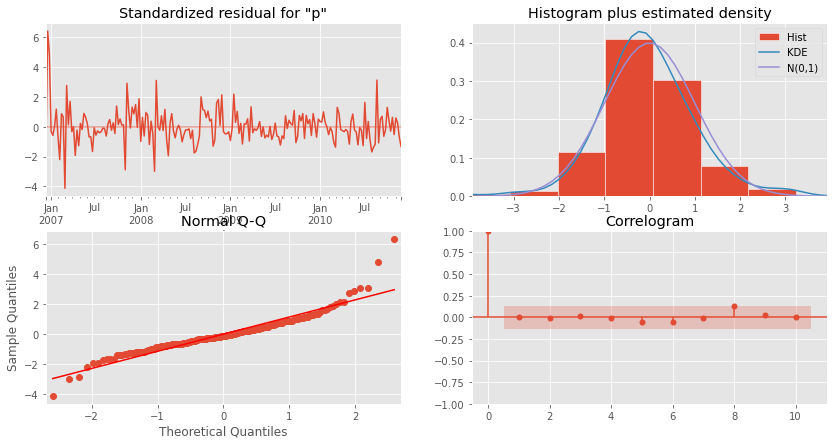

In [54]:
results.plot_diagnostics(figsize=FIGSIZE)
plt.show()

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

- In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (red dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- We can also observe that the residuals are uncorrelated (bottom right plot).

Based on this we can proceed with our model fitting.

### Find the optimal ARIMA model manually using Out-of-Time Cross validation
In this Out-of-Time cross-validation, we take few steps back in time and forecast into the future to as many steps we took back. Afterwards, we compare the forecast against the actuals.
To do this, we need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 80:20 ratio or a reasonable proportion based on time frequency of series.

In [55]:
# Create Training and Test
train_size = int(len(ts_data) * SPLIT)
train, test = ts_data[0:train_size], ts_data[train_size:]

In [56]:
print('Best Selected ARIMA: ',selected_val)
model = ARIMA(train, order=selected_val)
fitted = model.fit()
fc = fitted.forecast(test.shape[0], alpha=0.05)

# Determine accuracy metrics
arima = ts.forecast_accuracy(fc, test)
print (arima)

Best Selected ARIMA:  (8, 0, 0)
{'MAPE': 0.35672793247354806, 'MAE': 21298.303191560703, 'MSE': 689426456.126991, 'RMSE': 26256.93158247915}


Now, let's plot the column using our `plot_it` function from our class toolbox.

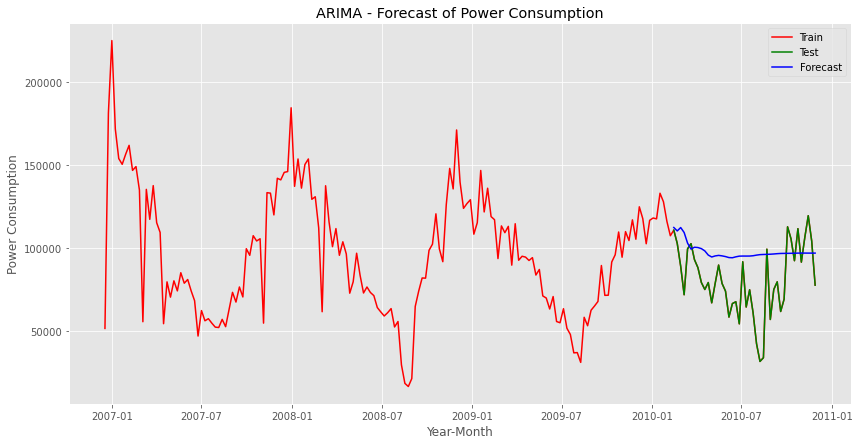

In [57]:
# Plot
fc_series = pd.Series(fc, index=test.index)
plt.figure(figsize=FIGSIZE)
plt.plot(ts_data, color='red',label='Train')
plt.plot(test, color='green',label='Test')
plt.plot(fc_series, color='blue',label='Forecast')
plt.title("ARIMA - Forecast of Power Consumption")
plt.xlabel('Year-Month')
plt.ylabel('Power Consumption')
plt.legend(loc="best")
plt.show()

In [58]:
# Plot using Plotly in our Toolbox for ARIMA
ts.plot_it(train.index,
           train,
           fc_series.index,
           fc_series,
           test.index,
           test,
           x_title='Year-Month',
           y_title='Power Consumption',
           title='ARIMA - Forecast of Power Consumption',
           t1_name='Train',
           t2_name='Forecast',
           t3_name='Test',
           mode='lines')

In [59]:
rmse_list, mape_list, mae_list = [], [], []
mape_list.append(round(arima['MAPE'], 2))
rmse_list.append(round(arima['RMSE'], 2))
mae_list.append(round(arima['MAE'], 2))
meterics_df = pd.DataFrame()
data = {'MAPE': mape_list, 'RMSE': rmse_list, 'MAE': mae_list}
meterics_df = pd.DataFrame(data, index=['ARIMA'])
meterics_df

,MAPE,RMSE,MAE
ARIMA,0.36,26256.93,21298.3


## Seasonal Autoregressive Integrated Moving Average (SARIMA)

$SARIMA$ is a type of time-series forecasting model that takes into account both seasonality and autocorrelation. $SARIMA$ models are based on a combination of differencing, autoregression, and moving average processes. These models can be used to forecast short-term or long-term trends in data. $SARIMA$ models are generally considered to be more accurate than other types of time-series forecasting models, such as $ARIMA$ models. $SARIMA$ models are also relatively easy to interpret and use. A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA models we have seen so far.

\begin{equation}
ARIMA\hspace{4em}(p,d,q)\hspace{4em}(P,D,Q)_m
\end{equation}

\begin{equation}
\begin{aligned}
\hspace{7em}\Uparrow\hspace{6em}\Uparrow
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\hspace{5em}\hspace{2em}Non-seasonal\;part\;of\;the\;model\hspace{2em}Seasonal\;part\;of\;the\;model\hspace{5em}
\end{aligned}
\end{equation}

The seasonal part of the model consists of terms that are similar to the non-seasonal components of the model, but involve backshifts of the seasonal period. For example, an $ARIMA(1,1,1)(1,1,1)_4$ model (without a constant) is for quarterly data ($m=4$), and can be written as

\begin{equation}
(1 -\phi_{1}\mathbf{B})(1 -\Phi_{1}\mathbf{B}^4)(1 -\mathbf{B})(1 -\mathbf{B}^4)y_t = (1 +\mathcal{m}_{1}\mathbf{B})(1 +\mathcal{M}_{1}\mathbf{B}^4)\epsilon_{t}
\end{equation}



The $SARIMA$ model can be used to forecast demand for a product or service over the course of a year. The model takes into account sales data from previous years as well as seasonality (e.g., holiday sales). $SARIMA$ can also be used to forecast other time-series data, such as stock prices or weather patterns. The $SARIMA$ model is a generalization of the $ARIMA$ model (which only accounts for autocorrelation), and it can be used to forecast data with seasonality. 

Almost the same process that we did in $ARIMA$, let's begin modeling.

In [60]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(
    ts_data,
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3,
    m=12,  # 12 is the frequency of the cycle
    start_P=0,
    seasonal=True,  # set to seasonal
    d=None,
    D=1,  # order of the seasonal differencing
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

print(SARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4439.075, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4555.506, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4479.315, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4437.414, Time=0.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4538.212, Time=0.22 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4439.414, Time=0.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4439.414, Time=2.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4478.801, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4441.181, Time=1.96 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4439.580, Time=0.41 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4439.809, Time=0.78 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4441.517, Time=0.50 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4441.101, Time=1.00 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=4444.612, Time=0.61 sec

Best model:  ARIMA

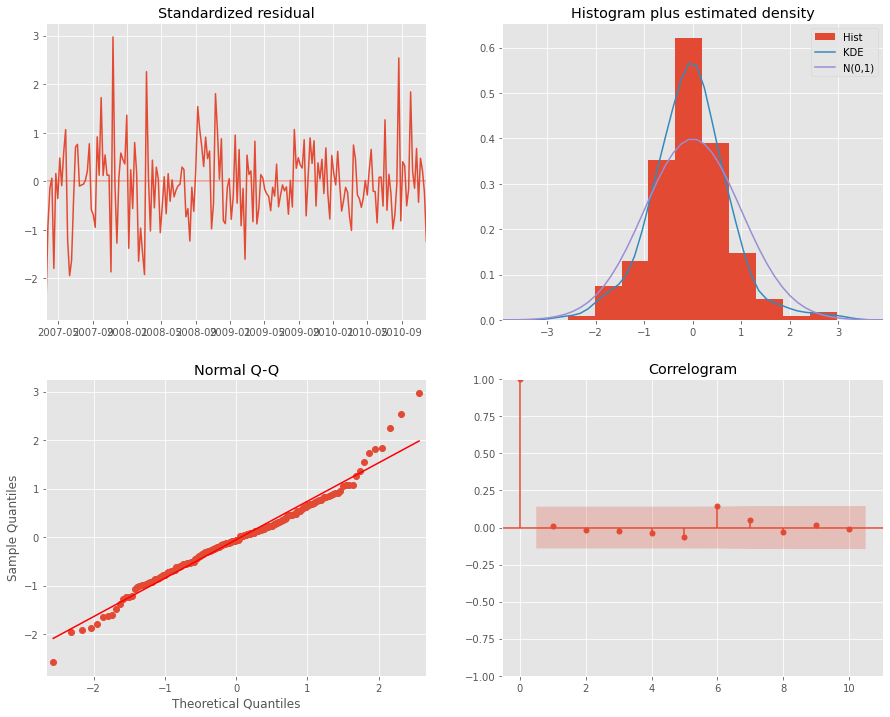

In [61]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

As observed in $SARIMA$, this suggests that the model residuals are normally distributed.

In [62]:
print('\t SARIMA MODEL : In - Sample Forecasting \n')
#Best model: SARIMA (0, 1, 1)x(0, 1, 1, 12) 
train_data = [x for x in train]
forecast = []
for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(train_data,
                                      order=(0, 1, 1),
                                      seasonal_order=(0, 1, 1, 12)  )
    model_fit = model.fit()
    result_fit = model_fit.forecast()
    y_hat = result_fit[0]
    forecast.append(float(y_hat))
    test_t = test[t]
    train_data.append(test_t)

	 SARIMA MODEL : In - Sample Forecasting 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05511D+01    |proj g|=  9.73698D-02


 This problem is unconstrained.



At iterate    5    f=  1.05429D+01    |proj g|=  1.21748D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.218D-05   1.054D+01
  F =   10.542872967369007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05536D+01    |proj g|=  9.62227D-02

At iterate    5    f=  1.05455D+01    |proj g|=  1.22551D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05560D+01    |proj g|=  9.66193D-02

At iterate    5    f=  1.05479D+01    |proj g|=  1.22940D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.229D-05   1.055D+01
  F =   10.547910501161788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05668D+01    |proj g|=  9.50039D-02

At iterate    5    f=  1.05592D+01    |proj g|=  1.23189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.232D-05   1.056D+01
  F =   10.559230330542302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05727D+01    |proj g|=  9.50654D-02

At iterate    5    f=  1.05650D+01    |proj g|=  1.24448D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.605D-05   1.057D+01
  F =   10.565019039123326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05752D+01    |proj g|=  9.40291D-02

At iterate    5    f=  1.05677D+01    |proj g|=  1.24519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.245D-05   1.057D+01
  F =   10.567681613178767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05776D+01    |proj g|=  9.38240D-02

At iterate    5    f=  1.05701D+01    |proj g|=  1.25087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.635D-05   1.057D+01
  F =   10.570106310745132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05800D+01    |proj g|=  9.32968D-02

At iterate    5    f=  1.05725D+01    |proj g|=  1.25352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.649D-05   1.057D+01
  F =   10.572530460347526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05838D+01    |proj g|=  9.13525D-02

At iterate    5    f=  1.05766D+01    |proj g|=  1.26683D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.667D-05   1.058D+01
  F =   10.576553644533522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05859D+01    |proj g|=  9.03914D-02

At iterate    5    f=  1.05789D+01    |proj g|=  1.26969D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.671D-05   1.058D+01
  F =   10.578881023558917     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05881D+01    |proj g|=  9.12161D-02

At iterate    5    f=  1.05810D+01    |proj g|=  1.27653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.731D-05   1.058D+01
  F =   10.580961386401768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05924D+01    |proj g|=  9.12232D-02

At iterate    5    f=  1.05851D+01    |proj g|=  1.28352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.284D-05   1.059D+01
  F =   10.585053409831668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05959D+01    |proj g|=  8.93061D-02

At iterate    5    f=  1.05888D+01    |proj g|=  1.28663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.287D-05   1.059D+01
  F =   10.588812498861300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05977D+01    |proj g|=  8.70632D-02

At iterate    5    f=  1.05909D+01    |proj g|=  1.29214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.292D-05   1.059D+01
  F =   10.590855035787266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06000D+01    |proj g|=  8.56214D-02

At iterate    5    f=  1.05931D+01    |proj g|=  1.59369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.299D-05   1.059D+01
  F =   10.593072630937188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06058D+01    |proj g|=  8.87504D-02

At iterate    5    f=  1.05988D+01    |proj g|=  1.30520D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.305D-05   1.060D+01
  F =   10.598777306038047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06006D+01    |proj g|=  1.31088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.311D-05   1.060D+01
  F =   10.600565670986409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06091D+01    |proj g|=  8.64485D-02

At iterate    5    f=  1.06022D+01    |proj g|=  1.31569D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.316D-05   1.060D+01
  F =   10.602219386718760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.314D-05   1.060D+01
  F =   10.604508442205040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06197D+01    |proj g|=  8.35594D-02

At iterate    5    f=  1.06136D+01    |proj g|=  1.30990D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.310D-05   1.061D+01
  F =   10.613568952202424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06161D+01    |proj g|=  1.30479D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.305D-05   1.062D+01
  F =   10.616054019026503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06235D+01    |proj g|=  8.30508D-02

At iterate    5    f=  1.06176D+01    |proj g|=  4.57888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.309D-05   1.062D+01
  F =   10.617584106051037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06192D+01    |proj g|=  2.60812D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.312D-05   1.062D+01
  F =   10.619151098223830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06306D+01    |proj g|=  8.25582D-02


 This problem is unconstrained.



At iterate    5    f=  1.06247D+01    |proj g|=  2.32696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.311D-05   1.062D+01
  F =   10.624681135268231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06344D+01    |proj g|=  7.84442D-02

At iterate    5    f=  1.06290D+01    |proj g|=  6.08507D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06357D+01    |proj g|=  7.89267D-02

At iterate    5    f=  1.06303D+01    |proj g|=  6.98861D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.327D-05   1.063D+01
  F =   10.630308750215692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06606D+01    |proj g|=  6.83724D-02


 This problem is unconstrained.



At iterate    5    f=  1.06562D+01    |proj g|=  1.46871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.276D-05   1.066D+01
  F =   10.656192058298348     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06627D+01    |proj g|=  6.19718D-02

At iterate    5    f=  1.06593D+01    |proj g|=  4.58181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.262D-05   1.066D+01
  F =   10.659257150849204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06661D+01    |proj g|=  6.26093D-02


 This problem is unconstrained.



At iterate    5    f=  1.06626D+01    |proj g|=  2.93499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.266D-05   1.066D+01
  F =   10.662640323042435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06679D+01    |proj g|=  6.18548D-02

At iterate    5    f=  1.06645D+01    |proj g|=  3.86443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.263D-05   1.066D+01
  F =   10.664487294254757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06704D+01    |proj g|=  6.11518D-02

At iterate    5    f=  1.06670D+01    |proj g|=  4.00890D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.281D-05   1.067D+01
  F =   10.667027557563861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06858D+01    |proj g|=  6.80564D-02

At iterate    5    f=  1.06815D+01    |proj g|=  3.14245D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.272D-05   1.068D+01
  F =   10.681497256466866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06870D+01    |proj g|=  6.80528D-02

At iterate    5    f=  1.06828D+01    |proj g|=  1.12505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.276D-05   1.068D+01
  F =   10.682782557607849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06882D+01    |proj g|=  6.77386D-02

At iterate    5    f=  1.06839D+01    |proj g|=  9.65562D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.279D-05   1.068D+01
  F =   10.683947179331097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06883D+01    |proj g|=  1.71731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.295D-05   1.069D+01
  F =   10.688270512880242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06937D+01    |proj g|=  6.48075D-02

At iterate    5    f=  1.06898D+01    |proj g|=  1.08761D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06954D+01    |proj g|=  6.40886D-02

At iterate    5    f=  1.06917D+01    |proj g|=  5.12589D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.304D-05   1.069D+01
  F =   10.691695765876490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07001D+01    |proj g|=  6.78204D-02

At iterate    5    f=  1.06957D+01    |proj g|=  4.71989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.327D-05   1.070D+01
  F =   10.695716770471339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.06969D+01    |proj g|=  1.32902D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.329D-05   1.070D+01
  F =   10.696887221276993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Let's compute the baseline $NAIVE$

In [63]:
# Determine accuracy metrics for Naive
naive_pred, naive_test, naive_train = ts.naive(ts_data)
naive = ts.forecast_accuracy(naive_pred, naive_test)
print(naive)

{'MAPE': 0.19894528190517238, 'MAE': 15305.586731273903, 'MSE': 393497432.9210436, 'RMSE': 19836.769719917695}


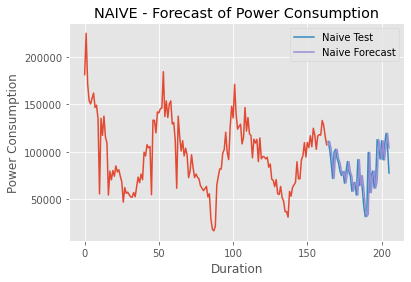

In [64]:
# Plot for NAIVE
plt.plot(naive_train)
plt.plot([None for i in naive_train] + [x for x in naive_test],
         label='Naive Test')
plt.plot([None for i in naive_train] + [x for x in naive_pred],
         label='Naive Forecast')
plt.legend(loc="best")
plt.title("NAIVE - Forecast of Power Consumption")
plt.xlabel('Duration')
plt.ylabel('Power Consumption')
plt.legend(loc="best")
plt.show()

In [65]:
# Determine accuracy metrics for SARIMA
predictions_series = pd.Series(forecast, index=test.index)
sarima = ts.forecast_accuracy(predictions_series, test)
print(sarima)

{'MAPE': 0.1827324604382355, 'MAE': 13863.411401612595, 'MSE': 360028486.21525085, 'RMSE': 18974.41662384514}


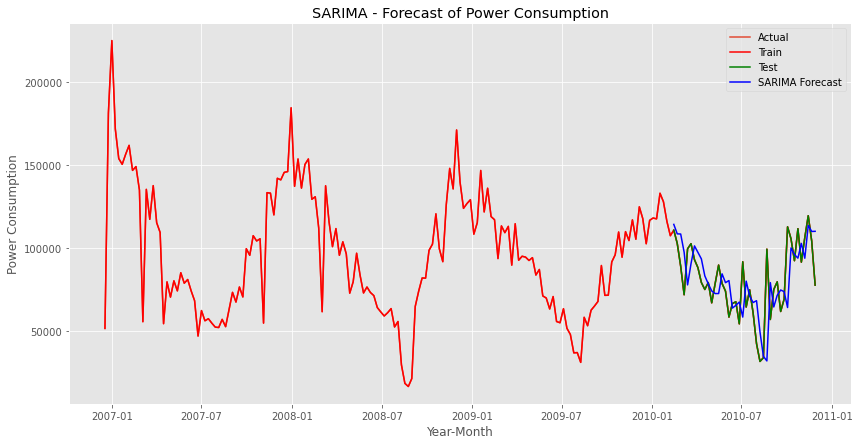

In [66]:
# Plot for SARIMA
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=FIGSIZE)
plt.subplot(1, 1, 1)
plt.plot(ts_data, label='Actual')
plt.plot(ts_data, color='red', label='Train')
plt.plot(test, color='green', label='Test')
plt.plot(predictions_series, color='blue', label='SARIMA Forecast')
plt.legend(loc="best")
plt.title("SARIMA - Forecast of Power Consumption")
plt.xlabel('Year-Month')
plt.ylabel('Power Consumption')
plt.legend(loc="best")
plt.show()

In [67]:
mape_list.append(round(naive['MAPE'], 2))
rmse_list.append(round(naive['RMSE'], 2))
mae_list.append(round(naive['MAE'], 2))
mape_list.append(round(sarima['MAPE'], 2))
rmse_list.append(round(sarima['RMSE'], 2))
mae_list.append(round(sarima['MAE'], 2))
meterics_df = pd.DataFrame()
data = {'MAPE': mape_list, 'RMSE': rmse_list, 'MAE': mae_list}
meterics_df = pd.DataFrame(data, index=['ARIMA', 'NAIVE', 'SARIMA'])
meterics_df

,MAPE,RMSE,MAE
ARIMA,0.36,26256.93,21298.30
NAIVE,0.20,19836.77,15305.59
SARIMA,0.18,18974.42,13863.41


Based on the above, it can is seen that the prediction fits well in the $SARIMA$ model. $MAPE$, $RMSE$, and $MAE$ of $SARIMA$ are comparatively lower than $ARIMA$ & $NAIVE$ models.

# Forecast Accuracy Evaluation Metrics

> "I often say that when you can measure what you are speaking about, and express it in numbers, you know something about it; but when you cannot measure it, when you cannot express it in numbers, your knowledge is of a very meagre and unsatisfactory kind." - **Lord Kelvin**

As seen above, it is important to evaluate forecast accuracy using genuine forecasts since the ability of a time series forecasting model to predict the future is defined by its performance. Time series prediction performance measurements provide a summary of the forecast model’s skill and capability in making the forecasts.

![Metrics](time-series-error-metrics.png)

## Mean Absolute Error (MAE) 

The $MAE$ is defined as the average of the absolute difference between forecasted and true values. calculated by taking the mean of the absolute differences between the actual values ($y$) and the predicted values ($\hat{y}$).

\begin{equation}
MAE= \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

$MAE$ is popular as it is easy to both **understand** and **compute**. And that’s its major advantage. It is recommended for assessing accuracy on a single series *(Hyndman, 2006)*. When **absolute error must be measured**, $MAE$ is useful.  Conversely, if you want to compare different series (with different units) it is not suitable.It's also not advisable to use it if you want to penalize outliers. In the case of **data with extreme values**, $MAE$ is inefficient. A forecast method that minimises the $MAE$ will lead to forecasts of the median.

## Mean Squared Error (MSE)

$MSE$ is defined as the average of the error squares. It is also known as the metric that evaluates the quality of a forecasting model or predictor. $MSE$ also takes into account variance (the difference between anticipated values) and bias (the distance of predicted value from its true value).

\begin{equation}
MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Due to its squaring, it **heavily weights large errors more than small ones**, which can be in some situations a disadvantage. In addition,due to this, $MSE$ is **frequently difficult to comprehend**. Therefore the $MSE$ is suitable for situations where you **really want to focus on large errors**. Also keep in mind that due to its squaring the metric **loses its unit**.

## Root Mean Squared Error (RMSE)

To avoid the MSE’s loss of its unit above, we can take the square root of it.  The $RMSE$ number is in the **same unit as the projected value**, which is an advantage of this technique. In comparison to $MSE$, this makes it **easier to comprehend**. This is also useful **when the spread is important and bigger values need to be penalized**. Having said that, it is more difficult to interpret though widely used .The $RMSE$ can also be compared to the $MAE$ to see whether there are any substantial but uncommon inaccuracies in the forecast. The wider the gap between $RMSE$ and $MAE$, the more erratic the error size. This statistic can mask issues with low data volume.

\begin{equation}
{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}


## Mean Absolute Percentage Error (MAPE)

As we know, the scale dependent metrics are not suitable for comparing different time series. $MAPE$ can solve this. Hence, the mean absolute percentage error ($MAPE$) is one of the most popular used error metrics in time series forecasting. It is calculated by taking the average (mean) of the absolute difference between actuals and predicted values divided by the actuals.

\begin{equation}
{MAPE} = \frac{1}{n}\sum_{i=1}^{n} \bigg|\frac{y_i - \hat{y}_i}{y_i}\bigg|
\end{equation}

$MAPE$’s advantages are it’s **scale-independency** and easy **interpretability**. As mentioned, the percentage error metrics can be used to compare the outcome of multiple time series models with different scales. Nonetheless, it has disadvantages like **it generates infinite or undefined values for zero or close-to-zero actual values** *(Kim and Kim 2016)*. Second, it also puts a **heavier penalty on negative than on positive errors** which leads to an **asymmetry** *(Hyndman 2014)*. In the case of **data with extreme values**, just like $MAE$, this is inefficient. Lastly,  $MAPE$ **can not be used when using percentages make no sense**. This is for example the case when measuring temperatures. The units Fahrenheit or Celsius scales have relatively arbitrary zero points, and it makes no sense to talk about percentages *(Hyndman and Koehler, 2006)*.

## Symmetric Mean Absolute Percentage Error

To avoid the asymmetry of the $MAPE$, this metric was . This is the **most controversial** error metrics, since not only different definitions or formulas exist but also critics claim that this metric is not symmetric as the name suggests *(Goodwin and Lawton, 1999)*.

\begin{equation}
SMAPE = \frac{1}{n}\sum_{i=1}^{n} \frac{|\hat{y}_i - y_i|}{|y_i| + |\hat{y}_i|}
\end{equation}

It’s advantages are that it avoids $MAPE’s$ problem of large errors when y-values are close to zero and the large difference between the absolute percentage errors when y is greater than y-hat and vice versa. Unlike $MAPE$ which has no limits, it fluctuates between $0\%$ and $200\%$ *(Makridakis and Hibon, 2000)*.

# Pragmatic Applications of Time Series forecasting

![applications](time-series-applications.png)

# Summary
We covered the definition of **auto-regressive** models and **linear** models. We also identified the baseline methods and formulas such as a $MA$ model to capture serial correlation using error relationship. On similar lines, $AR$ models were covered, which set up the forecasting using the lags as dependent observations. The $ARMA$-based approach was also illustrated, which integrates $AR$ and $MA$ models to capture any time-based trends. All these models assume stationarity; in scenarios where stationarity is not present, a differencing-based model such as $ARIMA$ is proposed, which performs differencing in time series datasets to remove any trend-related components. We also selected best parameters and interpret the results using different metrics. We identiied the cases, advantages, and limitations of each model. Lastly, pragmatic use cases were itemized. Below, is the summarized methodology to capture all the steps. This is only the beginning of our journey together...

>>
"The Best Way To Predict The Future Is To Create It"
>>- Abraham Lincoln

![methodology](time-series-methodology.png)

# References and Acknowledgments:
- Box, G. E. P., Gwilym, J. M., Gregory, R. C., &amp; Greta, L. M. (2016). Time Series Analysis Forecasting and Control. John Wiley &amp; Sons, Inc. 
- Brownlee, J. (2021, September 6). Autoregression models for time series forecasting with python. Machine Learning Mastery. Retrieved Sep 30, 2022, from https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
- Brownlee, J. (2020, December 9). How to grid search arima model hyperparameters with python. MachineLearningMastery.com. Retrieved October 3, 2022, from https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/ 
- Examples. statsmodels. (n.d.). Retrieved September 30, 2022, from https://www.statsmodels.org/dev/examples/index.html#time-series-analysis 
- Foo, K. (2017, December 28). ARMA: Causality and Invertibility of Stationary Time Series. Medium. Retrieved October 3, 2022, from https://medium.com/@kfoofw/arma-causality-and-invertibility-of-stationary-time-series-971b7d87b79c 
- Hyndman, R. J., &amp; Athanasopoulos, G. (2021). Forecasting: Principles and practice. Otexts. 
- Monterola, C. (2018, June). Notebook 10 Time Series Forecasting Method ARIMA. Lecture presented in Asian Institute of Management, Makati.
- Pal, A. (2017). Practical time series analysis: Master time series data processing, visualization, and modeling using Python. Packt. 
- Pandian, S. (2021, November 12). A comprehensive guide to time series analysis. Analytics Vidhya. Retrieved October 2, 2022, from https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/
- Prabhakaran, S. (2022, September 3). Arima model - complete guide to time series forecasting in python: ML+. Machine Learning Plus. Retrieved October 4, 2022, from https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
